# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

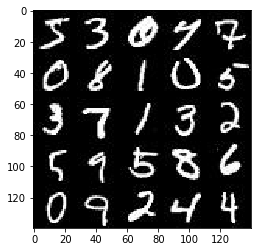

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

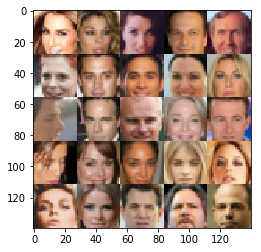

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1


/Users/sneg/tools/miniconda2/envs/deeplearning/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder (tf.float32, shape=[None, image_width, image_height, image_channels], name='input_real')
    input_z = tf.placeholder (tf.float32, shape=[None, z_dim], name='input_z')
    learning_rate = tf.placeholder (tf.float32, name='learning_rate')
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    in_shape = images.get_shape().as_list()
    inputs = tf.reshape (images, [-1, in_shape[1] * in_shape[2] * in_shape[3]])
    h1_nodes = 1024
    h2_nodes = 512
    alpha = 0.01
#        print ('Org-Input: {}. New-Inputs: {}. Output: {}'.format (in_shape, inputs.get_shape().as_list(), h1_nodes))

    with tf.variable_scope ('discriminator', reuse=reuse):
        # input is 28x28x3
        h1 = tf.layers.conv2d (images, 64, 5, strides=2, padding='same')
        h1 = tf.maximum (alpha * h1, h1)
        # 14x14x64 now
        
        h2 = tf.layers.conv2d (h1, 128, 5, strides=2, padding='same')
        h2 = tf.layers.batch_normalization (h2, training=True)
        h2 = tf.maximum (alpha * h2, h2)
        # 7x7x128 now
        
        flat = tf.reshape (h2, (-1, 7*7*128))
        logits = tf.layers.dense (flat, 1, activation=None)
        out = tf.sigmoid (logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.01
    
    with tf.variable_scope ('generator', reuse=is_train==False):
        h1 = tf.layers.dense (z, 7*7*512, activation=None)
        h1 = tf.reshape (h1, [-1, 7, 7, 512])
        h1 = tf.layers.batch_normalization (h1, training=is_train)
        h1 = tf.maximum (alpha * h1, h1)
        # 7x7x512 now
        
        h2 = tf.layers.conv2d_transpose (h1, 256, 5, strides=2, padding='same')
        h2 = tf.layers.batch_normalization (h2, training=is_train)
        h2 = tf.maximum (alpha * h2, h2)
        # 14x14x256 now
        
        h3 = tf.layers.conv2d_transpose (h2, 128, 5, strides=2, padding='same')
        h3 = tf.layers.batch_normalization (h3, training=is_train)
        h3 = tf.maximum (alpha * h3, h3)
        # 28x28x128 now
        
        logits = tf.layers.conv2d_transpose (h3, out_channel_dim, 5, strides=1, padding='same')
        out = tf.tanh (logits)
        # 28x28x3 now
        
#        logits = tf.layers.dense (h2, width * height * out_channel_dim, activation=None)
##        logits = tf.layers.batch_normalization (logits, training=is_train)
#        out = tf.tanh (logits)
#        out = tf.reshape (out, [-1, width, height, out_channel_dim])
#        print ('H1: {}. '.format (h1.get_shape().as_list()), 
#               'H2: {}. '.format (h2.get_shape().as_list()),
#               'H3: {}. '.format (h3.get_shape().as_list()),
#               'Logits: {}. '.format (logits.get_shape().as_list()))
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    gen_model = generator (input_z, out_channel_dim, is_train=True)
    
    smooth = 0.1
    
    disc_model_real, disc_logits_real = discriminator (input_real, reuse=False)
    disc_model_fake, disc_logits_fake = discriminator (gen_model, reuse=True)
    
    disc_loss_real = tf.reduce_mean (tf.nn.sigmoid_cross_entropy_with_logits (
        logits=disc_logits_real, labels=tf.ones_like(disc_logits_real) * (1 - smooth)))

    disc_loss_fake = tf.reduce_mean (tf.nn.sigmoid_cross_entropy_with_logits (
        logits=disc_logits_fake, labels=tf.zeros_like(disc_logits_fake)))
    
    disc_loss = disc_loss_real + disc_loss_fake
    
    gen_loss = tf.reduce_mean (tf.nn.sigmoid_cross_entropy_with_logits (
        logits=disc_logits_fake, labels=tf.ones_like(disc_logits_fake)))

    return disc_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    trainable = tf.trainable_variables()
    disc_vars = [var for var in trainable if var.name.startswith ('discriminator')]
    gen_vars  = [var for var in trainable if var.name.startswith ('generator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):    
        disc_opt = tf.train.AdamOptimizer (learning_rate, beta1=beta1).minimize (d_loss, var_list=disc_vars)
        gen_opt  = tf.train.AdamOptimizer (learning_rate, beta1=beta1).minimize (g_loss, var_list=gen_vars)
    
    return disc_opt, gen_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

In [11]:
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,1), nrows=1, ncols=7, sharey=True, sharex=True)
#    fig, axes = plt.subplots(figsize=(7,7), nrows=1, ncols=6, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')
    
    return fig, axes

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [18]:
import matplotlib.pyplot as plt
import pickle as pkl

def train(epoch_count, batch_size, z_dim, lr, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
#    tf.reset_default_graph()
#    print ('Data shape: {}'.format (data_shape))
    out_channel_dim = data_shape[3]
    input_real, input_z, learning_rate = model_inputs (data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss (input_real, input_z, out_channel_dim)
    d_opt, g_opt = model_opt (d_loss, g_loss, learning_rate, beta1)
    
    sample_z = np.random.uniform (-1, 1, size=(16, z_dim))
    samples = []
    losses = []
    step = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                step += 1
                batch_images = batch_images * 2
                batch_z = np.random.uniform (-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run (d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learning_rate: lr})
                _ = sess.run (g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learning_rate: lr})
                    
                if step % 10 == 0: 
                    train_loss_d = sess.run (d_loss, feed_dict={input_real: batch_images, input_z: batch_z})
                    train_loss_g = sess.run (g_loss, feed_dict={input_z: batch_z})
                    losses.append ((train_loss_d, train_loss_g))
            
                    print ("Epoch: {}/{}. ".format (epoch_i + 1, epoch_count),
                            "Step: {:4d}. ".format (step),
                            "Discriminator: {:.4f}. ".format (train_loss_d),
                            "Generator: {:.4f}.".format (train_loss_g))
            
                if step % 100 == 0:
#                    gen_samples = sess.run (
#                        generator (input_z, out_channel_dim, is_train=False),
#                        feed_dict = {input_z: sample_z})
#                    samples.append (gen_samples)
#                    _ = view_samples (len(samples) - 1, samples)
#                    plt.show()
                    show_generator_output(sess, 2, input_z, out_channel_dim, data_image_mode)

        show_generator_output(sess, 2, input_z, out_channel_dim, data_image_mode)

    with open('train_losses.pkl', 'wb') as f:
        pkl.dump (losses, f)

    with open('train_samples.pkl', 'wb') as f:
        pkl.dump (samples, f)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch: 1/2.  Step:   10.  Discriminator: 0.9400.  Generator: 1.2037.
Epoch: 1/2.  Step:   20.  Discriminator: 0.5238.  Generator: 2.0441.
Epoch: 1/2.  Step:   30.  Discriminator: 0.4611.  Generator: 2.8407.
Epoch: 1/2.  Step:   40.  Discriminator: 0.4807.  Generator: 2.6729.
Epoch: 1/2.  Step:   50.  Discriminator: 0.6750.  Generator: 1.6474.
Epoch: 1/2.  Step:   60.  Discriminator: 0.8087.  Generator: 1.2234.
Epoch: 1/2.  Step:   70.  Discriminator: 0.4845.  Generator: 2.3455.
Epoch: 1/2.  Step:   80.  Discriminator: 0.4023.  Generator: 3.6594.
Epoch: 1/2.  Step:   90.  Discriminator: 0.4171.  Generator: 3.1392.
Epoch: 1/2.  Step:  100.  Discriminator: 0.3787.  Generator: 3.6624.


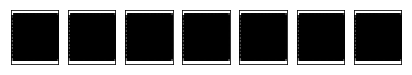

Epoch: 1/2.  Step:  110.  Discriminator: 0.3737.  Generator: 5.2571.
Epoch: 1/2.  Step:  120.  Discriminator: 0.3693.  Generator: 4.1177.
Epoch: 1/2.  Step:  130.  Discriminator: 0.3866.  Generator: 5.1900.
Epoch: 1/2.  Step:  140.  Discriminator: 0.3507.  Generator: 5.1536.
Epoch: 1/2.  Step:  150.  Discriminator: 0.3641.  Generator: 6.2533.
Epoch: 1/2.  Step:  160.  Discriminator: 0.3499.  Generator: 4.7200.
Epoch: 1/2.  Step:  170.  Discriminator: 0.3571.  Generator: 4.2411.
Epoch: 1/2.  Step:  180.  Discriminator: 0.3579.  Generator: 4.2905.
Epoch: 1/2.  Step:  190.  Discriminator: 0.3400.  Generator: 5.9890.
Epoch: 1/2.  Step:  200.  Discriminator: 0.3364.  Generator: 7.0271.


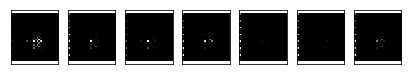

Epoch: 1/2.  Step:  210.  Discriminator: 0.3478.  Generator: 6.6337.
Epoch: 1/2.  Step:  220.  Discriminator: 0.3474.  Generator: 6.9434.
Epoch: 1/2.  Step:  230.  Discriminator: 0.3354.  Generator: 6.3840.
Epoch: 1/2.  Step:  240.  Discriminator: 0.3400.  Generator: 6.2508.
Epoch: 1/2.  Step:  250.  Discriminator: 0.3363.  Generator: 6.4960.
Epoch: 1/2.  Step:  260.  Discriminator: 0.3417.  Generator: 5.5692.
Epoch: 1/2.  Step:  270.  Discriminator: 0.3506.  Generator: 4.4747.
Epoch: 1/2.  Step:  280.  Discriminator: 0.3491.  Generator: 4.8992.
Epoch: 1/2.  Step:  290.  Discriminator: 0.3365.  Generator: 5.5403.
Epoch: 1/2.  Step:  300.  Discriminator: 0.3342.  Generator: 5.8818.


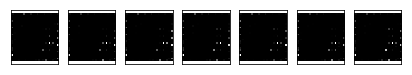

Epoch: 1/2.  Step:  310.  Discriminator: 0.3401.  Generator: 5.5961.
Epoch: 1/2.  Step:  320.  Discriminator: 0.3615.  Generator: 5.1226.
Epoch: 1/2.  Step:  330.  Discriminator: 0.3511.  Generator: 6.5589.
Epoch: 1/2.  Step:  340.  Discriminator: 0.3344.  Generator: 6.3264.
Epoch: 1/2.  Step:  350.  Discriminator: 0.3366.  Generator: 5.9518.
Epoch: 1/2.  Step:  360.  Discriminator: 0.3343.  Generator: 5.7956.
Epoch: 1/2.  Step:  370.  Discriminator: 0.3378.  Generator: 6.1596.
Epoch: 1/2.  Step:  380.  Discriminator: 0.3364.  Generator: 6.3866.
Epoch: 1/2.  Step:  390.  Discriminator: 0.3373.  Generator: 6.1629.
Epoch: 1/2.  Step:  400.  Discriminator: 0.3305.  Generator: 6.9258.


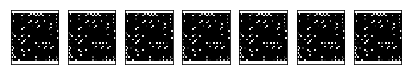

Epoch: 1/2.  Step:  410.  Discriminator: 0.4078.  Generator: 5.9262.
Epoch: 1/2.  Step:  420.  Discriminator: 0.3607.  Generator: 6.8785.
Epoch: 1/2.  Step:  430.  Discriminator: 0.3441.  Generator: 6.1256.
Epoch: 1/2.  Step:  440.  Discriminator: 0.3394.  Generator: 6.8624.
Epoch: 1/2.  Step:  450.  Discriminator: 0.3324.  Generator: 6.7331.
Epoch: 1/2.  Step:  460.  Discriminator: 0.3343.  Generator: 6.3975.
Epoch: 1/2.  Step:  470.  Discriminator: 0.3302.  Generator: 6.8224.
Epoch: 1/2.  Step:  480.  Discriminator: 0.3410.  Generator: 6.7100.
Epoch: 1/2.  Step:  490.  Discriminator: 0.3286.  Generator: 7.2629.
Epoch: 1/2.  Step:  500.  Discriminator: 0.3305.  Generator: 7.0269.


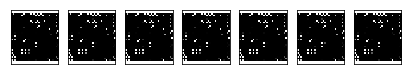

Epoch: 1/2.  Step:  510.  Discriminator: 0.3294.  Generator: 7.3043.
Epoch: 1/2.  Step:  520.  Discriminator: 0.3313.  Generator: 6.9886.
Epoch: 1/2.  Step:  530.  Discriminator: 0.3324.  Generator: 7.2159.
Epoch: 1/2.  Step:  540.  Discriminator: 0.3294.  Generator: 7.2666.
Epoch: 1/2.  Step:  550.  Discriminator: 0.3311.  Generator: 7.1113.
Epoch: 1/2.  Step:  560.  Discriminator: 0.3328.  Generator: 6.9707.
Epoch: 1/2.  Step:  570.  Discriminator: 0.3296.  Generator: 6.9767.
Epoch: 1/2.  Step:  580.  Discriminator: 0.3325.  Generator: 7.1272.
Epoch: 1/2.  Step:  590.  Discriminator: 0.3288.  Generator: 7.3571.
Epoch: 1/2.  Step:  600.  Discriminator: 0.3383.  Generator: 7.7930.


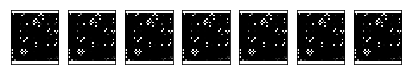

Epoch: 1/2.  Step:  610.  Discriminator: 0.3299.  Generator: 7.1495.
Epoch: 1/2.  Step:  620.  Discriminator: 0.3305.  Generator: 6.8872.
Epoch: 1/2.  Step:  630.  Discriminator: 0.3318.  Generator: 7.1554.
Epoch: 1/2.  Step:  640.  Discriminator: 0.3298.  Generator: 7.0218.
Epoch: 1/2.  Step:  650.  Discriminator: 0.3308.  Generator: 6.1655.
Epoch: 1/2.  Step:  660.  Discriminator: 0.3373.  Generator: 6.3456.
Epoch: 1/2.  Step:  670.  Discriminator: 0.3368.  Generator: 6.4238.
Epoch: 1/2.  Step:  680.  Discriminator: 0.3407.  Generator: 4.4635.
Epoch: 1/2.  Step:  690.  Discriminator: 0.3388.  Generator: 5.7641.
Epoch: 1/2.  Step:  700.  Discriminator: 0.3718.  Generator: 4.0863.


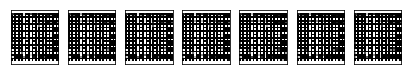

Epoch: 1/2.  Step:  710.  Discriminator: 0.3581.  Generator: 6.1012.
Epoch: 1/2.  Step:  720.  Discriminator: 0.4734.  Generator: 3.5714.
Epoch: 1/2.  Step:  730.  Discriminator: 0.3720.  Generator: 8.4748.
Epoch: 1/2.  Step:  740.  Discriminator: 0.3572.  Generator: 5.5297.
Epoch: 1/2.  Step:  750.  Discriminator: 0.3553.  Generator: 5.8340.
Epoch: 1/2.  Step:  760.  Discriminator: 0.3370.  Generator: 7.0784.
Epoch: 1/2.  Step:  770.  Discriminator: 0.3422.  Generator: 9.7881.
Epoch: 1/2.  Step:  780.  Discriminator: 0.3314.  Generator: 9.9535.
Epoch: 1/2.  Step:  790.  Discriminator: 0.3384.  Generator: 8.8621.
Epoch: 1/2.  Step:  800.  Discriminator: 0.3387.  Generator: 9.3678.


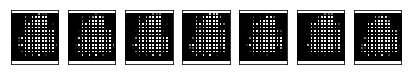

Epoch: 1/2.  Step:  810.  Discriminator: 0.3317.  Generator: 8.8564.
Epoch: 1/2.  Step:  820.  Discriminator: 0.3373.  Generator: 7.7545.
Epoch: 1/2.  Step:  830.  Discriminator: 0.3443.  Generator: 8.0398.
Epoch: 1/2.  Step:  840.  Discriminator: 0.3400.  Generator: 6.8745.
Epoch: 1/2.  Step:  850.  Discriminator: 0.3316.  Generator: 7.7686.
Epoch: 1/2.  Step:  860.  Discriminator: 0.3329.  Generator: 7.6752.
Epoch: 1/2.  Step:  870.  Discriminator: 0.3284.  Generator: 8.0370.
Epoch: 1/2.  Step:  880.  Discriminator: 0.3346.  Generator: 7.8155.
Epoch: 1/2.  Step:  890.  Discriminator: 0.3288.  Generator: 8.0154.
Epoch: 1/2.  Step:  900.  Discriminator: 0.3305.  Generator: 7.5721.


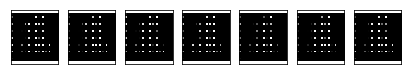

Epoch: 1/2.  Step:  910.  Discriminator: 0.3376.  Generator: 7.2159.
Epoch: 1/2.  Step:  920.  Discriminator: 0.3287.  Generator: 7.3613.
Epoch: 1/2.  Step:  930.  Discriminator: 0.3294.  Generator: 7.5124.
Epoch: 1/2.  Step:  940.  Discriminator: 0.3278.  Generator: 7.6842.
Epoch: 1/2.  Step:  950.  Discriminator: 0.3280.  Generator: 7.9351.
Epoch: 1/2.  Step:  960.  Discriminator: 0.3310.  Generator: 7.7995.
Epoch: 1/2.  Step:  970.  Discriminator: 0.3308.  Generator: 8.2040.
Epoch: 1/2.  Step:  980.  Discriminator: 0.3306.  Generator: 7.9404.
Epoch: 1/2.  Step:  990.  Discriminator: 0.3282.  Generator: 7.9937.
Epoch: 1/2.  Step: 1000.  Discriminator: 0.3280.  Generator: 8.0704.


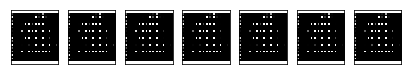

Epoch: 1/2.  Step: 1010.  Discriminator: 0.3279.  Generator: 7.9991.
Epoch: 1/2.  Step: 1020.  Discriminator: 0.3299.  Generator: 8.0883.
Epoch: 1/2.  Step: 1030.  Discriminator: 0.3272.  Generator: 8.2465.
Epoch: 1/2.  Step: 1040.  Discriminator: 0.3326.  Generator: 7.7841.
Epoch: 1/2.  Step: 1050.  Discriminator: 0.3274.  Generator: 7.9902.
Epoch: 1/2.  Step: 1060.  Discriminator: 0.3280.  Generator: 8.0076.
Epoch: 1/2.  Step: 1070.  Discriminator: 0.3273.  Generator: 8.2204.
Epoch: 1/2.  Step: 1080.  Discriminator: 0.3276.  Generator: 8.2589.
Epoch: 1/2.  Step: 1090.  Discriminator: 0.3279.  Generator: 8.3842.
Epoch: 1/2.  Step: 1100.  Discriminator: 0.3303.  Generator: 8.4758.


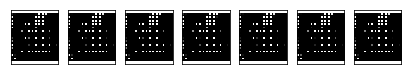

Epoch: 1/2.  Step: 1110.  Discriminator: 0.3277.  Generator: 8.0727.
Epoch: 1/2.  Step: 1120.  Discriminator: 0.3274.  Generator: 8.1412.
Epoch: 1/2.  Step: 1130.  Discriminator: 0.3280.  Generator: 8.2716.
Epoch: 1/2.  Step: 1140.  Discriminator: 0.3268.  Generator: 8.1453.
Epoch: 1/2.  Step: 1150.  Discriminator: 0.3273.  Generator: 8.2930.
Epoch: 1/2.  Step: 1160.  Discriminator: 0.3281.  Generator: 8.4787.
Epoch: 1/2.  Step: 1170.  Discriminator: 0.3264.  Generator: 8.4817.
Epoch: 1/2.  Step: 1180.  Discriminator: 0.3287.  Generator: 8.5068.
Epoch: 1/2.  Step: 1190.  Discriminator: 0.3283.  Generator: 8.3748.
Epoch: 1/2.  Step: 1200.  Discriminator: 0.3273.  Generator: 8.3761.


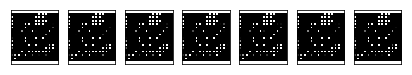

Epoch: 1/2.  Step: 1210.  Discriminator: 0.3271.  Generator: 8.3410.
Epoch: 1/2.  Step: 1220.  Discriminator: 0.3274.  Generator: 8.4295.
Epoch: 1/2.  Step: 1230.  Discriminator: 0.3285.  Generator: 8.5185.
Epoch: 1/2.  Step: 1240.  Discriminator: 0.3273.  Generator: 8.7059.
Epoch: 1/2.  Step: 1250.  Discriminator: 0.3274.  Generator: 8.5397.
Epoch: 1/2.  Step: 1260.  Discriminator: 0.3283.  Generator: 8.5267.
Epoch: 1/2.  Step: 1270.  Discriminator: 0.3267.  Generator: 8.4879.
Epoch: 1/2.  Step: 1280.  Discriminator: 0.3266.  Generator: 8.6276.
Epoch: 1/2.  Step: 1290.  Discriminator: 0.3268.  Generator: 8.5427.
Epoch: 1/2.  Step: 1300.  Discriminator: 0.3270.  Generator: 8.2987.


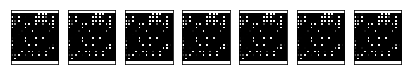

Epoch: 1/2.  Step: 1310.  Discriminator: 0.3271.  Generator: 8.3158.
Epoch: 1/2.  Step: 1320.  Discriminator: 0.3269.  Generator: 8.4624.
Epoch: 1/2.  Step: 1330.  Discriminator: 0.3262.  Generator: 8.3329.
Epoch: 1/2.  Step: 1340.  Discriminator: 0.3288.  Generator: 8.3562.
Epoch: 1/2.  Step: 1350.  Discriminator: 0.3266.  Generator: 8.5545.
Epoch: 1/2.  Step: 1360.  Discriminator: 0.3282.  Generator: 8.4411.
Epoch: 1/2.  Step: 1370.  Discriminator: 0.3268.  Generator: 8.5776.
Epoch: 1/2.  Step: 1380.  Discriminator: 0.3276.  Generator: 8.7082.
Epoch: 1/2.  Step: 1390.  Discriminator: 0.3281.  Generator: 8.6190.
Epoch: 1/2.  Step: 1400.  Discriminator: 0.3277.  Generator: 8.7022.


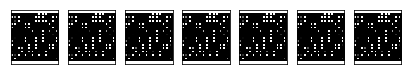

Epoch: 1/2.  Step: 1410.  Discriminator: 0.3282.  Generator: 8.6953.
Epoch: 1/2.  Step: 1420.  Discriminator: 0.3261.  Generator: 8.6829.
Epoch: 1/2.  Step: 1430.  Discriminator: 0.3262.  Generator: 8.8077.
Epoch: 1/2.  Step: 1440.  Discriminator: 0.3279.  Generator: 8.9850.
Epoch: 1/2.  Step: 1450.  Discriminator: 0.3278.  Generator: 8.8835.
Epoch: 1/2.  Step: 1460.  Discriminator: 0.3257.  Generator: 8.9588.
Epoch: 1/2.  Step: 1470.  Discriminator: 0.3271.  Generator: 8.9187.
Epoch: 1/2.  Step: 1480.  Discriminator: 0.3263.  Generator: 8.8621.
Epoch: 1/2.  Step: 1490.  Discriminator: 0.3262.  Generator: 8.8699.
Epoch: 1/2.  Step: 1500.  Discriminator: 0.3261.  Generator: 8.8540.


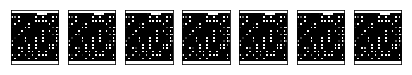

Epoch: 1/2.  Step: 1510.  Discriminator: 0.3264.  Generator: 8.7666.
Epoch: 1/2.  Step: 1520.  Discriminator: 0.3269.  Generator: 8.5428.
Epoch: 1/2.  Step: 1530.  Discriminator: 0.3260.  Generator: 8.0844.
Epoch: 1/2.  Step: 1540.  Discriminator: 0.3341.  Generator: 4.8924.
Epoch: 1/2.  Step: 1550.  Discriminator: 0.3269.  Generator: 6.9840.
Epoch: 1/2.  Step: 1560.  Discriminator: 0.3271.  Generator: 8.0361.
Epoch: 1/2.  Step: 1570.  Discriminator: 0.3273.  Generator: 8.4487.
Epoch: 1/2.  Step: 1580.  Discriminator: 0.3269.  Generator: 8.4321.
Epoch: 1/2.  Step: 1590.  Discriminator: 0.3264.  Generator: 8.3944.
Epoch: 1/2.  Step: 1600.  Discriminator: 0.3266.  Generator: 8.2239.


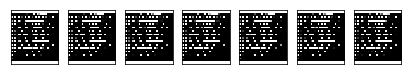

Epoch: 1/2.  Step: 1610.  Discriminator: 0.3269.  Generator: 8.0192.
Epoch: 1/2.  Step: 1620.  Discriminator: 0.3270.  Generator: 8.1055.
Epoch: 1/2.  Step: 1630.  Discriminator: 0.3268.  Generator: 8.2607.
Epoch: 1/2.  Step: 1640.  Discriminator: 0.3287.  Generator: 8.0362.
Epoch: 1/2.  Step: 1650.  Discriminator: 0.3280.  Generator: 8.2491.
Epoch: 1/2.  Step: 1660.  Discriminator: 0.3266.  Generator: 8.4461.
Epoch: 1/2.  Step: 1670.  Discriminator: 0.3283.  Generator: 8.6253.
Epoch: 1/2.  Step: 1680.  Discriminator: 0.3261.  Generator: 8.4918.
Epoch: 1/2.  Step: 1690.  Discriminator: 0.3303.  Generator: 8.4312.
Epoch: 1/2.  Step: 1700.  Discriminator: 0.3272.  Generator: 8.7965.


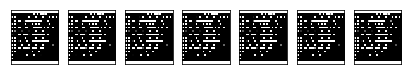

Epoch: 1/2.  Step: 1710.  Discriminator: 0.3259.  Generator: 8.9313.
Epoch: 1/2.  Step: 1720.  Discriminator: 0.3297.  Generator: 9.0325.
Epoch: 1/2.  Step: 1730.  Discriminator: 0.3272.  Generator: 9.3811.
Epoch: 1/2.  Step: 1740.  Discriminator: 0.3263.  Generator: 9.3196.
Epoch: 1/2.  Step: 1750.  Discriminator: 0.3271.  Generator: 9.2512.
Epoch: 1/2.  Step: 1760.  Discriminator: 0.3267.  Generator: 9.2594.
Epoch: 1/2.  Step: 1770.  Discriminator: 0.3263.  Generator: 8.9308.
Epoch: 1/2.  Step: 1780.  Discriminator: 0.3276.  Generator: 8.5288.
Epoch: 1/2.  Step: 1790.  Discriminator: 0.3266.  Generator: 8.5906.
Epoch: 1/2.  Step: 1800.  Discriminator: 0.3265.  Generator: 8.3772.


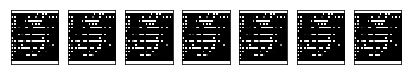

Epoch: 1/2.  Step: 1810.  Discriminator: 0.3267.  Generator: 8.4446.
Epoch: 1/2.  Step: 1820.  Discriminator: 0.3261.  Generator: 8.6163.
Epoch: 1/2.  Step: 1830.  Discriminator: 0.7577.  Generator: 1.0913.
Epoch: 1/2.  Step: 1840.  Discriminator: 0.3855.  Generator: 6.0893.
Epoch: 1/2.  Step: 1850.  Discriminator: 0.5005.  Generator: 6.2726.
Epoch: 1/2.  Step: 1860.  Discriminator: 0.3938.  Generator: 6.4083.
Epoch: 1/2.  Step: 1870.  Discriminator: 0.4050.  Generator: 5.2941.
Epoch: 2/2.  Step: 1880.  Discriminator: 0.3635.  Generator: 5.8182.
Epoch: 2/2.  Step: 1890.  Discriminator: 0.5440.  Generator: 4.6885.
Epoch: 2/2.  Step: 1900.  Discriminator: 0.4076.  Generator: 7.7739.


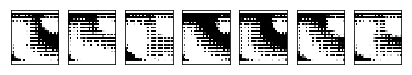

Epoch: 2/2.  Step: 1910.  Discriminator: 0.3530.  Generator: 4.9446.
Epoch: 2/2.  Step: 1920.  Discriminator: 0.3864.  Generator: 3.4278.
Epoch: 2/2.  Step: 1930.  Discriminator: 0.8137.  Generator: 1.9120.
Epoch: 2/2.  Step: 1940.  Discriminator: 0.5428.  Generator: 2.3836.
Epoch: 2/2.  Step: 1950.  Discriminator: 0.7259.  Generator: 3.8441.
Epoch: 2/2.  Step: 1960.  Discriminator: 0.4342.  Generator: 4.7081.
Epoch: 2/2.  Step: 1970.  Discriminator: 0.4336.  Generator: 4.0809.
Epoch: 2/2.  Step: 1980.  Discriminator: 0.5903.  Generator: 1.9205.
Epoch: 2/2.  Step: 1990.  Discriminator: 0.3615.  Generator: 5.4295.
Epoch: 2/2.  Step: 2000.  Discriminator: 0.4475.  Generator: 3.7954.


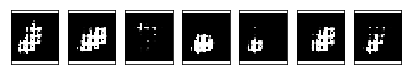

Epoch: 2/2.  Step: 2010.  Discriminator: 0.4336.  Generator: 4.1195.
Epoch: 2/2.  Step: 2020.  Discriminator: 0.3900.  Generator: 4.1027.
Epoch: 2/2.  Step: 2030.  Discriminator: 0.4233.  Generator: 4.1682.
Epoch: 2/2.  Step: 2040.  Discriminator: 0.4543.  Generator: 2.9582.
Epoch: 2/2.  Step: 2050.  Discriminator: 0.4666.  Generator: 3.3002.
Epoch: 2/2.  Step: 2060.  Discriminator: 0.5118.  Generator: 2.7590.
Epoch: 2/2.  Step: 2070.  Discriminator: 0.4438.  Generator: 4.2117.
Epoch: 2/2.  Step: 2080.  Discriminator: 0.5620.  Generator: 3.2528.
Epoch: 2/2.  Step: 2090.  Discriminator: 0.4526.  Generator: 3.0521.
Epoch: 2/2.  Step: 2100.  Discriminator: 0.5318.  Generator: 2.2075.


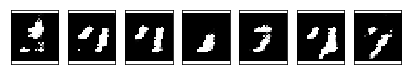

Epoch: 2/2.  Step: 2110.  Discriminator: 0.4191.  Generator: 3.6858.
Epoch: 2/2.  Step: 2120.  Discriminator: 0.5245.  Generator: 2.4241.
Epoch: 2/2.  Step: 2130.  Discriminator: 0.6487.  Generator: 3.8417.
Epoch: 2/2.  Step: 2140.  Discriminator: 0.4468.  Generator: 3.8551.
Epoch: 2/2.  Step: 2150.  Discriminator: 0.4352.  Generator: 3.7482.
Epoch: 2/2.  Step: 2160.  Discriminator: 0.5211.  Generator: 3.4301.
Epoch: 2/2.  Step: 2170.  Discriminator: 0.6011.  Generator: 2.6890.
Epoch: 2/2.  Step: 2180.  Discriminator: 0.5850.  Generator: 2.2063.
Epoch: 2/2.  Step: 2190.  Discriminator: 0.7644.  Generator: 1.6761.
Epoch: 2/2.  Step: 2200.  Discriminator: 0.7601.  Generator: 2.6541.


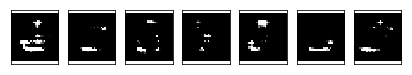

Epoch: 2/2.  Step: 2210.  Discriminator: 0.5393.  Generator: 3.9623.
Epoch: 2/2.  Step: 2220.  Discriminator: 0.4782.  Generator: 3.6666.
Epoch: 2/2.  Step: 2230.  Discriminator: 0.9992.  Generator: 1.5870.
Epoch: 2/2.  Step: 2240.  Discriminator: 0.5973.  Generator: 3.0108.
Epoch: 2/2.  Step: 2250.  Discriminator: 0.6322.  Generator: 3.8120.
Epoch: 2/2.  Step: 2260.  Discriminator: 0.5428.  Generator: 3.5220.
Epoch: 2/2.  Step: 2270.  Discriminator: 0.7339.  Generator: 1.6097.
Epoch: 2/2.  Step: 2280.  Discriminator: 0.5278.  Generator: 2.9810.
Epoch: 2/2.  Step: 2290.  Discriminator: 0.6582.  Generator: 2.6453.
Epoch: 2/2.  Step: 2300.  Discriminator: 0.6651.  Generator: 2.1427.


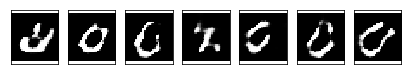

Epoch: 2/2.  Step: 2310.  Discriminator: 1.5185.  Generator: 0.9468.
Epoch: 2/2.  Step: 2320.  Discriminator: 0.8706.  Generator: 1.6094.
Epoch: 2/2.  Step: 2330.  Discriminator: 1.4815.  Generator: 1.4209.
Epoch: 2/2.  Step: 2340.  Discriminator: 1.0804.  Generator: 2.0350.
Epoch: 2/2.  Step: 2350.  Discriminator: 0.8518.  Generator: 2.2779.
Epoch: 2/2.  Step: 2360.  Discriminator: 1.0164.  Generator: 1.5830.
Epoch: 2/2.  Step: 2370.  Discriminator: 0.7888.  Generator: 3.0655.
Epoch: 2/2.  Step: 2380.  Discriminator: 0.8379.  Generator: 2.4407.
Epoch: 2/2.  Step: 2390.  Discriminator: 0.8962.  Generator: 1.6148.
Epoch: 2/2.  Step: 2400.  Discriminator: 0.6371.  Generator: 2.8534.


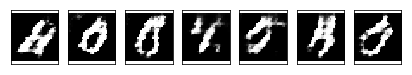

Epoch: 2/2.  Step: 2410.  Discriminator: 1.1466.  Generator: 1.2714.
Epoch: 2/2.  Step: 2420.  Discriminator: 0.6332.  Generator: 3.2118.
Epoch: 2/2.  Step: 2430.  Discriminator: 0.8790.  Generator: 2.4465.
Epoch: 2/2.  Step: 2440.  Discriminator: 1.2869.  Generator: 2.4010.
Epoch: 2/2.  Step: 2450.  Discriminator: 0.8378.  Generator: 2.1351.
Epoch: 2/2.  Step: 2460.  Discriminator: 1.1593.  Generator: 2.0265.
Epoch: 2/2.  Step: 2470.  Discriminator: 1.0898.  Generator: 2.3234.
Epoch: 2/2.  Step: 2480.  Discriminator: 1.0642.  Generator: 2.0549.
Epoch: 2/2.  Step: 2490.  Discriminator: 0.7656.  Generator: 1.5608.
Epoch: 2/2.  Step: 2500.  Discriminator: 1.1283.  Generator: 0.8909.


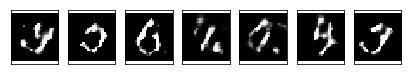

Epoch: 2/2.  Step: 2510.  Discriminator: 1.2198.  Generator: 1.5581.
Epoch: 2/2.  Step: 2520.  Discriminator: 1.0996.  Generator: 1.5652.
Epoch: 2/2.  Step: 2530.  Discriminator: 1.1195.  Generator: 1.8045.
Epoch: 2/2.  Step: 2540.  Discriminator: 1.2163.  Generator: 1.4024.
Epoch: 2/2.  Step: 2550.  Discriminator: 1.0472.  Generator: 1.2819.
Epoch: 2/2.  Step: 2560.  Discriminator: 0.5028.  Generator: 2.6365.
Epoch: 2/2.  Step: 2570.  Discriminator: 0.6300.  Generator: 2.8021.
Epoch: 2/2.  Step: 2580.  Discriminator: 0.8607.  Generator: 2.6252.
Epoch: 2/2.  Step: 2590.  Discriminator: 0.7617.  Generator: 2.2943.
Epoch: 2/2.  Step: 2600.  Discriminator: 0.9557.  Generator: 1.7237.


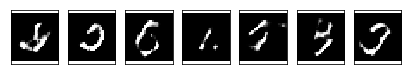

Epoch: 2/2.  Step: 2610.  Discriminator: 0.9430.  Generator: 1.4103.
Epoch: 2/2.  Step: 2620.  Discriminator: 0.7152.  Generator: 1.7326.
Epoch: 2/2.  Step: 2630.  Discriminator: 0.7337.  Generator: 1.7738.
Epoch: 2/2.  Step: 2640.  Discriminator: 0.8769.  Generator: 1.6520.
Epoch: 2/2.  Step: 2650.  Discriminator: 1.0900.  Generator: 1.7310.
Epoch: 2/2.  Step: 2660.  Discriminator: 1.1456.  Generator: 1.6934.
Epoch: 2/2.  Step: 2670.  Discriminator: 0.8333.  Generator: 2.1203.
Epoch: 2/2.  Step: 2680.  Discriminator: 0.8898.  Generator: 1.2885.
Epoch: 2/2.  Step: 2690.  Discriminator: 0.9337.  Generator: 1.1252.
Epoch: 2/2.  Step: 2700.  Discriminator: 0.9482.  Generator: 1.1909.


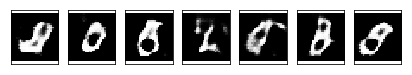

Epoch: 2/2.  Step: 2710.  Discriminator: 0.6123.  Generator: 1.9428.
Epoch: 2/2.  Step: 2720.  Discriminator: 0.7883.  Generator: 2.1019.
Epoch: 2/2.  Step: 2730.  Discriminator: 0.8669.  Generator: 2.1013.
Epoch: 2/2.  Step: 2740.  Discriminator: 0.8226.  Generator: 2.0478.
Epoch: 2/2.  Step: 2750.  Discriminator: 0.6543.  Generator: 2.0675.
Epoch: 2/2.  Step: 2760.  Discriminator: 0.9228.  Generator: 1.5589.
Epoch: 2/2.  Step: 2770.  Discriminator: 1.0286.  Generator: 1.2137.
Epoch: 2/2.  Step: 2780.  Discriminator: 0.9209.  Generator: 1.3638.
Epoch: 2/2.  Step: 2790.  Discriminator: 0.7052.  Generator: 1.9927.
Epoch: 2/2.  Step: 2800.  Discriminator: 0.7016.  Generator: 1.9895.


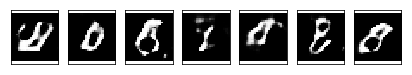

Epoch: 2/2.  Step: 2810.  Discriminator: 0.7481.  Generator: 1.6216.
Epoch: 2/2.  Step: 2820.  Discriminator: 1.0837.  Generator: 1.6493.
Epoch: 2/2.  Step: 2830.  Discriminator: 0.6752.  Generator: 1.8898.
Epoch: 2/2.  Step: 2840.  Discriminator: 1.2389.  Generator: 1.1902.
Epoch: 2/2.  Step: 2850.  Discriminator: 0.8951.  Generator: 1.8059.
Epoch: 2/2.  Step: 2860.  Discriminator: 0.7888.  Generator: 2.8093.
Epoch: 2/2.  Step: 2870.  Discriminator: 0.6683.  Generator: 2.5113.
Epoch: 2/2.  Step: 2880.  Discriminator: 0.7149.  Generator: 2.0053.
Epoch: 2/2.  Step: 2890.  Discriminator: 0.8873.  Generator: 1.3972.
Epoch: 2/2.  Step: 2900.  Discriminator: 0.6291.  Generator: 1.9745.


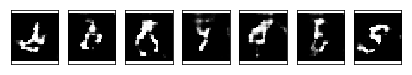

Epoch: 2/2.  Step: 2910.  Discriminator: 1.2501.  Generator: 1.4362.
Epoch: 2/2.  Step: 2920.  Discriminator: 0.6171.  Generator: 2.2639.
Epoch: 2/2.  Step: 2930.  Discriminator: 0.7648.  Generator: 2.2945.
Epoch: 2/2.  Step: 2940.  Discriminator: 0.6948.  Generator: 2.4395.
Epoch: 2/2.  Step: 2950.  Discriminator: 0.5837.  Generator: 2.3423.
Epoch: 2/2.  Step: 2960.  Discriminator: 0.7578.  Generator: 2.2042.
Epoch: 2/2.  Step: 2970.  Discriminator: 1.1909.  Generator: 1.1283.
Epoch: 2/2.  Step: 2980.  Discriminator: 1.1671.  Generator: 1.1145.
Epoch: 2/2.  Step: 2990.  Discriminator: 1.0363.  Generator: 1.4482.
Epoch: 2/2.  Step: 3000.  Discriminator: 0.8098.  Generator: 2.0416.


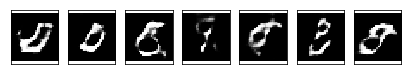

Epoch: 2/2.  Step: 3010.  Discriminator: 0.8837.  Generator: 1.6956.
Epoch: 2/2.  Step: 3020.  Discriminator: 0.9559.  Generator: 1.6121.
Epoch: 2/2.  Step: 3030.  Discriminator: 0.8285.  Generator: 1.9112.
Epoch: 2/2.  Step: 3040.  Discriminator: 0.8089.  Generator: 2.0781.
Epoch: 2/2.  Step: 3050.  Discriminator: 0.6046.  Generator: 2.2549.
Epoch: 2/2.  Step: 3060.  Discriminator: 0.9049.  Generator: 1.2807.
Epoch: 2/2.  Step: 3070.  Discriminator: 0.8035.  Generator: 1.7045.
Epoch: 2/2.  Step: 3080.  Discriminator: 0.7541.  Generator: 2.0105.
Epoch: 2/2.  Step: 3090.  Discriminator: 0.9683.  Generator: 1.4918.
Epoch: 2/2.  Step: 3100.  Discriminator: 0.7076.  Generator: 2.0677.


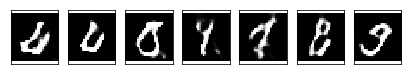

Epoch: 2/2.  Step: 3110.  Discriminator: 0.8162.  Generator: 1.6279.
Epoch: 2/2.  Step: 3120.  Discriminator: 0.8979.  Generator: 1.3938.
Epoch: 2/2.  Step: 3130.  Discriminator: 0.8923.  Generator: 1.5809.
Epoch: 2/2.  Step: 3140.  Discriminator: 0.6941.  Generator: 1.9684.
Epoch: 2/2.  Step: 3150.  Discriminator: 0.8865.  Generator: 1.8894.
Epoch: 2/2.  Step: 3160.  Discriminator: 1.0267.  Generator: 1.4066.
Epoch: 2/2.  Step: 3170.  Discriminator: 0.8135.  Generator: 1.4543.
Epoch: 2/2.  Step: 3180.  Discriminator: 1.0762.  Generator: 1.3668.
Epoch: 2/2.  Step: 3190.  Discriminator: 1.1273.  Generator: 2.1259.
Epoch: 2/2.  Step: 3200.  Discriminator: 0.8972.  Generator: 1.9734.


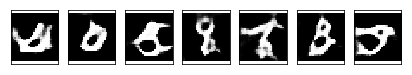

Epoch: 2/2.  Step: 3210.  Discriminator: 0.6950.  Generator: 2.0182.
Epoch: 2/2.  Step: 3220.  Discriminator: 1.1648.  Generator: 1.9237.
Epoch: 2/2.  Step: 3230.  Discriminator: 0.9415.  Generator: 2.1570.
Epoch: 2/2.  Step: 3240.  Discriminator: 0.7183.  Generator: 2.1829.
Epoch: 2/2.  Step: 3250.  Discriminator: 0.9655.  Generator: 1.3973.
Epoch: 2/2.  Step: 3260.  Discriminator: 0.8830.  Generator: 1.7949.
Epoch: 2/2.  Step: 3270.  Discriminator: 1.1899.  Generator: 1.0989.
Epoch: 2/2.  Step: 3280.  Discriminator: 1.3744.  Generator: 0.6607.
Epoch: 2/2.  Step: 3290.  Discriminator: 1.0913.  Generator: 1.0321.
Epoch: 2/2.  Step: 3300.  Discriminator: 0.9691.  Generator: 1.6825.


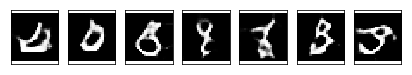

Epoch: 2/2.  Step: 3310.  Discriminator: 0.9691.  Generator: 1.4702.
Epoch: 2/2.  Step: 3320.  Discriminator: 1.0220.  Generator: 1.1534.
Epoch: 2/2.  Step: 3330.  Discriminator: 0.9445.  Generator: 1.4621.
Epoch: 2/2.  Step: 3340.  Discriminator: 0.8398.  Generator: 1.8303.
Epoch: 2/2.  Step: 3350.  Discriminator: 1.2140.  Generator: 1.2054.
Epoch: 2/2.  Step: 3360.  Discriminator: 0.8896.  Generator: 1.4294.
Epoch: 2/2.  Step: 3370.  Discriminator: 1.0901.  Generator: 1.4502.
Epoch: 2/2.  Step: 3380.  Discriminator: 0.9053.  Generator: 2.0117.
Epoch: 2/2.  Step: 3390.  Discriminator: 0.7141.  Generator: 1.9662.
Epoch: 2/2.  Step: 3400.  Discriminator: 0.9624.  Generator: 1.2465.


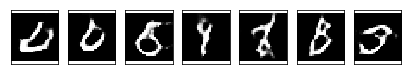

Epoch: 2/2.  Step: 3410.  Discriminator: 0.8874.  Generator: 1.5062.
Epoch: 2/2.  Step: 3420.  Discriminator: 1.0143.  Generator: 1.1727.
Epoch: 2/2.  Step: 3430.  Discriminator: 1.0171.  Generator: 1.3211.
Epoch: 2/2.  Step: 3440.  Discriminator: 0.9215.  Generator: 1.7202.
Epoch: 2/2.  Step: 3450.  Discriminator: 1.0725.  Generator: 1.2554.
Epoch: 2/2.  Step: 3460.  Discriminator: 0.9584.  Generator: 1.2618.
Epoch: 2/2.  Step: 3470.  Discriminator: 1.0062.  Generator: 1.5863.
Epoch: 2/2.  Step: 3480.  Discriminator: 0.7310.  Generator: 1.8028.
Epoch: 2/2.  Step: 3490.  Discriminator: 0.8135.  Generator: 1.9239.
Epoch: 2/2.  Step: 3500.  Discriminator: 1.1438.  Generator: 1.0231.


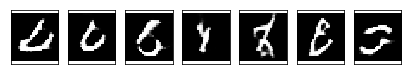

Epoch: 2/2.  Step: 3510.  Discriminator: 1.6304.  Generator: 0.5132.
Epoch: 2/2.  Step: 3520.  Discriminator: 1.0242.  Generator: 1.1983.
Epoch: 2/2.  Step: 3530.  Discriminator: 0.7669.  Generator: 1.7075.
Epoch: 2/2.  Step: 3540.  Discriminator: 0.8674.  Generator: 1.7721.
Epoch: 2/2.  Step: 3550.  Discriminator: 1.0600.  Generator: 1.6463.
Epoch: 2/2.  Step: 3560.  Discriminator: 1.0416.  Generator: 1.1750.
Epoch: 2/2.  Step: 3570.  Discriminator: 0.9326.  Generator: 1.5843.
Epoch: 2/2.  Step: 3580.  Discriminator: 0.7335.  Generator: 2.2104.
Epoch: 2/2.  Step: 3590.  Discriminator: 2.6495.  Generator: 1.4646.
Epoch: 2/2.  Step: 3600.  Discriminator: 1.6923.  Generator: 0.9045.


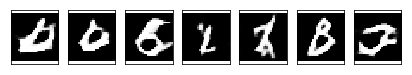

Epoch: 2/2.  Step: 3610.  Discriminator: 0.6321.  Generator: 2.0273.
Epoch: 2/2.  Step: 3620.  Discriminator: 0.5972.  Generator: 2.2915.
Epoch: 2/2.  Step: 3630.  Discriminator: 1.6230.  Generator: 1.8515.
Epoch: 2/2.  Step: 3640.  Discriminator: 1.0497.  Generator: 1.7134.
Epoch: 2/2.  Step: 3650.  Discriminator: 0.7437.  Generator: 2.0189.
Epoch: 2/2.  Step: 3660.  Discriminator: 0.7592.  Generator: 1.4401.
Epoch: 2/2.  Step: 3670.  Discriminator: 1.1329.  Generator: 1.1170.
Epoch: 2/2.  Step: 3680.  Discriminator: 1.1745.  Generator: 1.1007.
Epoch: 2/2.  Step: 3690.  Discriminator: 1.1652.  Generator: 1.1064.
Epoch: 2/2.  Step: 3700.  Discriminator: 1.0524.  Generator: 1.3346.


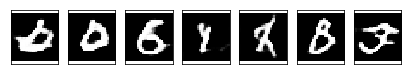

Epoch: 2/2.  Step: 3710.  Discriminator: 0.8348.  Generator: 1.4661.
Epoch: 2/2.  Step: 3720.  Discriminator: 1.1311.  Generator: 1.3409.
Epoch: 2/2.  Step: 3730.  Discriminator: 0.9826.  Generator: 1.5845.
Epoch: 2/2.  Step: 3740.  Discriminator: 0.9157.  Generator: 1.7659.
Epoch: 2/2.  Step: 3750.  Discriminator: 1.0454.  Generator: 1.5044.


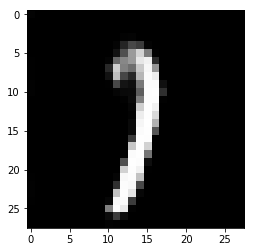

In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.9

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

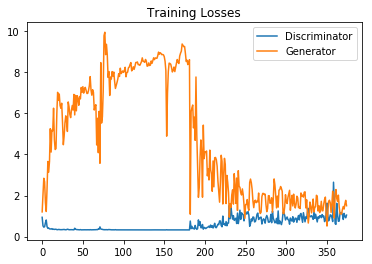

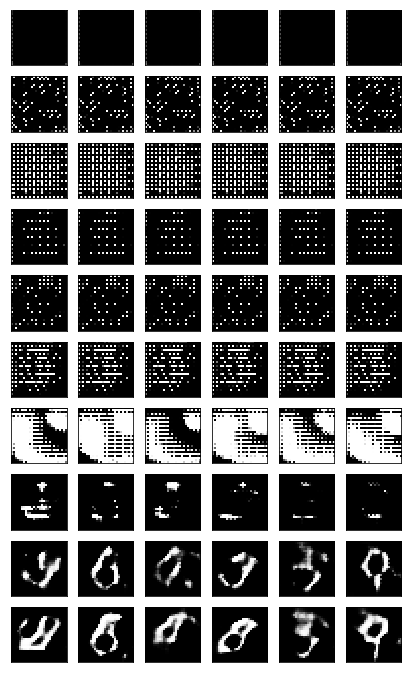

In [14]:
def plot_losses():
    with open ('train_losses.pkl', 'rb') as f:
        losses = pkl.load (f)

    fig, ax = plt.subplots()
    losses = np.array(losses)
    plt.plot(losses.T[0], label='Discriminator')
    plt.plot(losses.T[1], label='Generator')
    plt.title("Training Losses")
    plt.legend()
    
def show_samples():
    with open ('train_samples.pkl', 'rb') as f:
        samples = pkl.load (f)
    
    rows, cols = 10, 6
    fig, axes = plt.subplots(figsize=(7,12), nrows=rows, ncols=cols, sharex=True, sharey=True)

    for sample, ax_row in zip(samples[::int(len(samples)/rows)], axes):
        for img, ax in zip(sample[::int(len(sample)/cols)], ax_row):
            ax.imshow(img.reshape((28,28)), cmap='Greys_r')
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)

plot_losses()
show_samples()

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch: 1/1.  Step:   10.  Discriminator: 1.6269.  Generator: 0.5540.
Epoch: 1/1.  Step:   20.  Discriminator: 0.9730.  Generator: 1.4893.
Epoch: 1/1.  Step:   30.  Discriminator: 1.0105.  Generator: 2.4289.
Epoch: 1/1.  Step:   40.  Discriminator: 0.6310.  Generator: 2.0257.
Epoch: 1/1.  Step:   50.  Discriminator: 0.4958.  Generator: 3.3957.
Epoch: 1/1.  Step:   60.  Discriminator: 0.5821.  Generator: 2.1349.
Epoch: 1/1.  Step:   70.  Discriminator: 0.5497.  Generator: 3.7430.
Epoch: 1/1.  Step:   80.  Discriminator: 0.4669.  Generator: 3.0116.
Epoch: 1/1.  Step:   90.  Discriminator: 0.5197.  Generator: 2.4439.
Epoch: 1/1.  Step:  100.  Discriminator: 0.6027.  Generator: 3.2360.


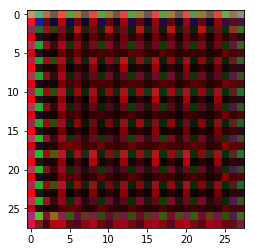

Epoch: 1/1.  Step:  110.  Discriminator: 0.4476.  Generator: 2.8545.
Epoch: 1/1.  Step:  120.  Discriminator: 0.4347.  Generator: 2.7066.
Epoch: 1/1.  Step:  130.  Discriminator: 0.4366.  Generator: 4.6597.
Epoch: 1/1.  Step:  140.  Discriminator: 0.4997.  Generator: 2.2015.
Epoch: 1/1.  Step:  150.  Discriminator: 0.6338.  Generator: 2.0916.
Epoch: 1/1.  Step:  160.  Discriminator: 0.4267.  Generator: 3.1260.
Epoch: 1/1.  Step:  170.  Discriminator: 0.3944.  Generator: 4.4210.
Epoch: 1/1.  Step:  180.  Discriminator: 0.3882.  Generator: 3.2928.
Epoch: 1/1.  Step:  190.  Discriminator: 0.3715.  Generator: 4.2187.
Epoch: 1/1.  Step:  200.  Discriminator: 0.3781.  Generator: 3.8847.


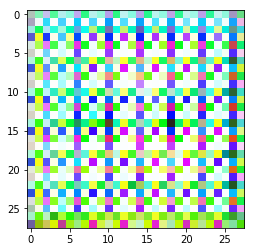

Epoch: 1/1.  Step:  210.  Discriminator: 0.3564.  Generator: 4.2638.
Epoch: 1/1.  Step:  220.  Discriminator: 0.3590.  Generator: 4.4208.
Epoch: 1/1.  Step:  230.  Discriminator: 0.4010.  Generator: 3.5273.
Epoch: 1/1.  Step:  240.  Discriminator: 0.3602.  Generator: 3.8594.
Epoch: 1/1.  Step:  250.  Discriminator: 0.3600.  Generator: 4.1402.
Epoch: 1/1.  Step:  260.  Discriminator: 0.3584.  Generator: 3.8504.
Epoch: 1/1.  Step:  270.  Discriminator: 0.4102.  Generator: 3.3969.
Epoch: 1/1.  Step:  280.  Discriminator: 0.4357.  Generator: 2.7225.
Epoch: 1/1.  Step:  290.  Discriminator: 0.4371.  Generator: 3.0027.
Epoch: 1/1.  Step:  300.  Discriminator: 0.4429.  Generator: 2.6851.


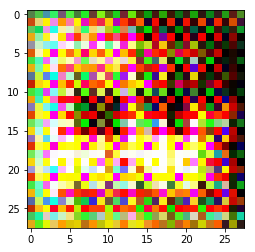

Epoch: 1/1.  Step:  310.  Discriminator: 0.4360.  Generator: 3.7922.
Epoch: 1/1.  Step:  320.  Discriminator: 0.3930.  Generator: 3.7640.
Epoch: 1/1.  Step:  330.  Discriminator: 0.4041.  Generator: 3.2619.
Epoch: 1/1.  Step:  340.  Discriminator: 0.4013.  Generator: 4.6782.
Epoch: 1/1.  Step:  350.  Discriminator: 0.3617.  Generator: 3.9527.
Epoch: 1/1.  Step:  360.  Discriminator: 0.4124.  Generator: 2.9533.
Epoch: 1/1.  Step:  370.  Discriminator: 0.4187.  Generator: 3.3263.
Epoch: 1/1.  Step:  380.  Discriminator: 0.4438.  Generator: 2.9239.
Epoch: 1/1.  Step:  390.  Discriminator: 0.4222.  Generator: 4.0596.
Epoch: 1/1.  Step:  400.  Discriminator: 0.3924.  Generator: 3.6214.


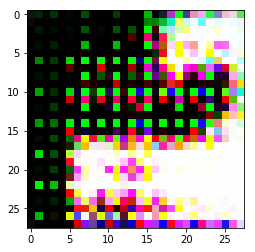

Epoch: 1/1.  Step:  410.  Discriminator: 0.4629.  Generator: 3.4681.
Epoch: 1/1.  Step:  420.  Discriminator: 0.3724.  Generator: 4.0063.
Epoch: 1/1.  Step:  430.  Discriminator: 0.4624.  Generator: 3.2399.
Epoch: 1/1.  Step:  440.  Discriminator: 0.4282.  Generator: 3.4874.
Epoch: 1/1.  Step:  450.  Discriminator: 0.4158.  Generator: 3.2828.
Epoch: 1/1.  Step:  460.  Discriminator: 0.4205.  Generator: 3.1668.
Epoch: 1/1.  Step:  470.  Discriminator: 0.4034.  Generator: 3.3344.
Epoch: 1/1.  Step:  480.  Discriminator: 0.3843.  Generator: 4.9047.
Epoch: 1/1.  Step:  490.  Discriminator: 0.3817.  Generator: 4.0672.
Epoch: 1/1.  Step:  500.  Discriminator: 0.3785.  Generator: 4.1659.


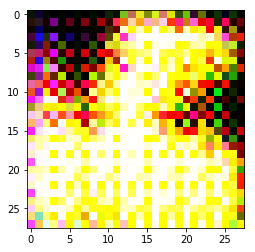

Epoch: 1/1.  Step:  510.  Discriminator: 0.3880.  Generator: 3.9150.
Epoch: 1/1.  Step:  520.  Discriminator: 0.3742.  Generator: 3.8635.
Epoch: 1/1.  Step:  530.  Discriminator: 0.3897.  Generator: 4.2666.
Epoch: 1/1.  Step:  540.  Discriminator: 0.3812.  Generator: 3.9977.
Epoch: 1/1.  Step:  550.  Discriminator: 0.4324.  Generator: 3.4265.
Epoch: 1/1.  Step:  560.  Discriminator: 0.3718.  Generator: 3.7837.
Epoch: 1/1.  Step:  570.  Discriminator: 0.4146.  Generator: 3.4464.
Epoch: 1/1.  Step:  580.  Discriminator: 0.3838.  Generator: 4.0849.
Epoch: 1/1.  Step:  590.  Discriminator: 0.4386.  Generator: 3.4625.
Epoch: 1/1.  Step:  600.  Discriminator: 0.4766.  Generator: 2.8717.


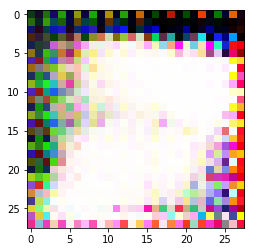

Epoch: 1/1.  Step:  610.  Discriminator: 0.4510.  Generator: 2.6991.
Epoch: 1/1.  Step:  620.  Discriminator: 0.5238.  Generator: 2.9573.
Epoch: 1/1.  Step:  630.  Discriminator: 0.5144.  Generator: 2.3963.
Epoch: 1/1.  Step:  640.  Discriminator: 0.5615.  Generator: 4.1962.
Epoch: 1/1.  Step:  650.  Discriminator: 0.6088.  Generator: 3.3692.
Epoch: 1/1.  Step:  660.  Discriminator: 0.4616.  Generator: 3.1820.
Epoch: 1/1.  Step:  670.  Discriminator: 0.4620.  Generator: 3.6715.
Epoch: 1/1.  Step:  680.  Discriminator: 0.5740.  Generator: 2.3942.
Epoch: 1/1.  Step:  690.  Discriminator: 0.4297.  Generator: 3.1186.
Epoch: 1/1.  Step:  700.  Discriminator: 0.4371.  Generator: 3.4892.


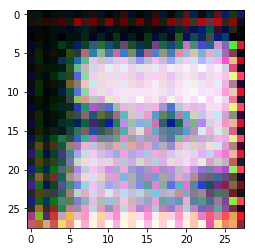

Epoch: 1/1.  Step:  710.  Discriminator: 0.5818.  Generator: 2.0403.
Epoch: 1/1.  Step:  720.  Discriminator: 0.4756.  Generator: 2.8112.
Epoch: 1/1.  Step:  730.  Discriminator: 0.5969.  Generator: 2.1913.
Epoch: 1/1.  Step:  740.  Discriminator: 0.4110.  Generator: 4.7999.
Epoch: 1/1.  Step:  750.  Discriminator: 0.4946.  Generator: 2.6901.
Epoch: 1/1.  Step:  760.  Discriminator: 0.5176.  Generator: 3.1291.
Epoch: 1/1.  Step:  770.  Discriminator: 0.4731.  Generator: 3.4427.
Epoch: 1/1.  Step:  780.  Discriminator: 0.4005.  Generator: 4.2787.
Epoch: 1/1.  Step:  790.  Discriminator: 0.5920.  Generator: 2.5988.
Epoch: 1/1.  Step:  800.  Discriminator: 0.5835.  Generator: 6.9165.


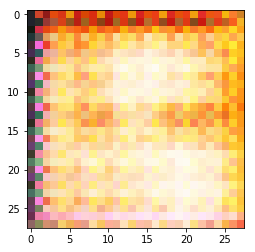

Epoch: 1/1.  Step:  810.  Discriminator: 0.4619.  Generator: 8.5746.
Epoch: 1/1.  Step:  820.  Discriminator: 0.4305.  Generator: 5.4388.
Epoch: 1/1.  Step:  830.  Discriminator: 0.4366.  Generator: 4.1668.
Epoch: 1/1.  Step:  840.  Discriminator: 0.5285.  Generator: 2.3988.
Epoch: 1/1.  Step:  850.  Discriminator: 0.4256.  Generator: 5.3002.
Epoch: 1/1.  Step:  860.  Discriminator: 0.3713.  Generator: 5.8775.
Epoch: 1/1.  Step:  870.  Discriminator: 0.4167.  Generator: 3.4669.
Epoch: 1/1.  Step:  880.  Discriminator: 0.4201.  Generator: 3.6199.
Epoch: 1/1.  Step:  890.  Discriminator: 0.7161.  Generator: 1.6005.
Epoch: 1/1.  Step:  900.  Discriminator: 0.6613.  Generator: 2.1433.


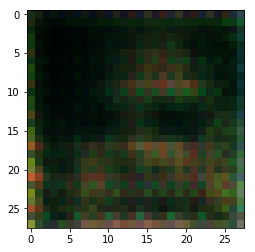

Epoch: 1/1.  Step:  910.  Discriminator: 0.5856.  Generator: 1.6896.
Epoch: 1/1.  Step:  920.  Discriminator: 0.4666.  Generator: 6.8755.
Epoch: 1/1.  Step:  930.  Discriminator: 0.6102.  Generator: 2.9254.
Epoch: 1/1.  Step:  940.  Discriminator: 0.6994.  Generator: 2.4663.
Epoch: 1/1.  Step:  950.  Discriminator: 0.5248.  Generator: 2.9854.
Epoch: 1/1.  Step:  960.  Discriminator: 0.5336.  Generator: 2.8617.
Epoch: 1/1.  Step:  970.  Discriminator: 1.0101.  Generator: 1.3402.
Epoch: 1/1.  Step:  980.  Discriminator: 1.1178.  Generator: 1.1993.
Epoch: 1/1.  Step:  990.  Discriminator: 0.8959.  Generator: 1.4187.
Epoch: 1/1.  Step: 1000.  Discriminator: 0.6074.  Generator: 2.2930.


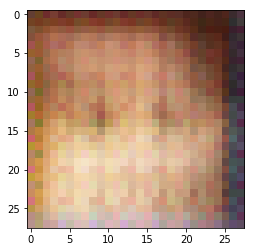

Epoch: 1/1.  Step: 1010.  Discriminator: 0.6113.  Generator: 2.0347.
Epoch: 1/1.  Step: 1020.  Discriminator: 0.5793.  Generator: 2.2732.
Epoch: 1/1.  Step: 1030.  Discriminator: 0.7291.  Generator: 1.8866.
Epoch: 1/1.  Step: 1040.  Discriminator: 0.9820.  Generator: 1.3077.
Epoch: 1/1.  Step: 1050.  Discriminator: 0.8685.  Generator: 2.0099.
Epoch: 1/1.  Step: 1060.  Discriminator: 0.9267.  Generator: 1.8311.
Epoch: 1/1.  Step: 1070.  Discriminator: 0.6151.  Generator: 2.3919.
Epoch: 1/1.  Step: 1080.  Discriminator: 0.8004.  Generator: 2.7776.
Epoch: 1/1.  Step: 1090.  Discriminator: 0.5863.  Generator: 6.1788.
Epoch: 1/1.  Step: 1100.  Discriminator: 0.5626.  Generator: 2.8359.


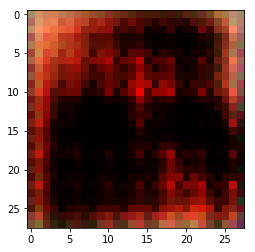

Epoch: 1/1.  Step: 1110.  Discriminator: 0.4931.  Generator: 3.0635.
Epoch: 1/1.  Step: 1120.  Discriminator: 0.6414.  Generator: 2.5315.
Epoch: 1/1.  Step: 1130.  Discriminator: 0.6422.  Generator: 2.4688.
Epoch: 1/1.  Step: 1140.  Discriminator: 0.7487.  Generator: 2.6389.
Epoch: 1/1.  Step: 1150.  Discriminator: 0.6853.  Generator: 3.4467.
Epoch: 1/1.  Step: 1160.  Discriminator: 0.6084.  Generator: 2.5401.
Epoch: 1/1.  Step: 1170.  Discriminator: 0.7961.  Generator: 1.8628.
Epoch: 1/1.  Step: 1180.  Discriminator: 0.8356.  Generator: 1.5606.
Epoch: 1/1.  Step: 1190.  Discriminator: 0.4715.  Generator: 2.7118.
Epoch: 1/1.  Step: 1200.  Discriminator: 0.7539.  Generator: 2.7541.


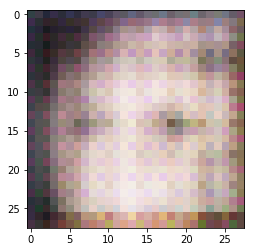

Epoch: 1/1.  Step: 1210.  Discriminator: 0.6088.  Generator: 3.2831.
Epoch: 1/1.  Step: 1220.  Discriminator: 0.6349.  Generator: 2.7558.
Epoch: 1/1.  Step: 1230.  Discriminator: 0.5931.  Generator: 3.2671.
Epoch: 1/1.  Step: 1240.  Discriminator: 0.7389.  Generator: 2.1052.
Epoch: 1/1.  Step: 1250.  Discriminator: 0.8977.  Generator: 2.6772.
Epoch: 1/1.  Step: 1260.  Discriminator: 0.7461.  Generator: 2.8519.
Epoch: 1/1.  Step: 1270.  Discriminator: 0.6143.  Generator: 3.2861.
Epoch: 1/1.  Step: 1280.  Discriminator: 0.7263.  Generator: 1.7757.
Epoch: 1/1.  Step: 1290.  Discriminator: 1.3187.  Generator: 1.4895.
Epoch: 1/1.  Step: 1300.  Discriminator: 0.6881.  Generator: 2.5383.


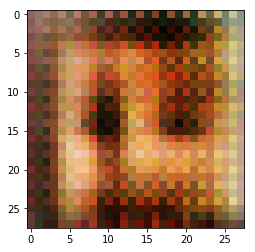

Epoch: 1/1.  Step: 1310.  Discriminator: 0.6356.  Generator: 3.0255.
Epoch: 1/1.  Step: 1320.  Discriminator: 0.7183.  Generator: 2.0501.
Epoch: 1/1.  Step: 1330.  Discriminator: 0.5178.  Generator: 2.9375.
Epoch: 1/1.  Step: 1340.  Discriminator: 0.5550.  Generator: 2.5838.
Epoch: 1/1.  Step: 1350.  Discriminator: 0.5257.  Generator: 3.2494.
Epoch: 1/1.  Step: 1360.  Discriminator: 0.4965.  Generator: 3.7809.
Epoch: 1/1.  Step: 1370.  Discriminator: 0.5712.  Generator: 3.0182.
Epoch: 1/1.  Step: 1380.  Discriminator: 0.5381.  Generator: 2.6710.
Epoch: 1/1.  Step: 1390.  Discriminator: 0.6410.  Generator: 2.5004.
Epoch: 1/1.  Step: 1400.  Discriminator: 0.5491.  Generator: 2.9664.


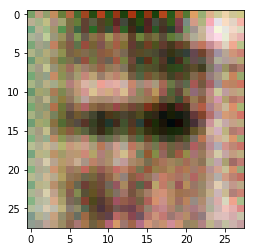

Epoch: 1/1.  Step: 1410.  Discriminator: 0.5067.  Generator: 2.9888.
Epoch: 1/1.  Step: 1420.  Discriminator: 0.8123.  Generator: 2.1515.
Epoch: 1/1.  Step: 1430.  Discriminator: 0.6952.  Generator: 2.1386.
Epoch: 1/1.  Step: 1440.  Discriminator: 0.6218.  Generator: 2.3347.
Epoch: 1/1.  Step: 1450.  Discriminator: 0.8473.  Generator: 1.7469.
Epoch: 1/1.  Step: 1460.  Discriminator: 0.7642.  Generator: 2.0124.
Epoch: 1/1.  Step: 1470.  Discriminator: 0.8648.  Generator: 2.0872.
Epoch: 1/1.  Step: 1480.  Discriminator: 0.6360.  Generator: 2.4612.
Epoch: 1/1.  Step: 1490.  Discriminator: 0.5715.  Generator: 2.2645.
Epoch: 1/1.  Step: 1500.  Discriminator: 0.6149.  Generator: 2.3065.


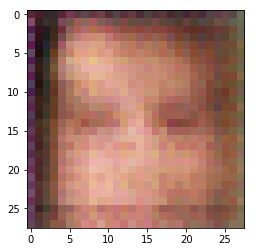

Epoch: 1/1.  Step: 1510.  Discriminator: 0.7191.  Generator: 1.9424.
Epoch: 1/1.  Step: 1520.  Discriminator: 0.5549.  Generator: 2.1180.
Epoch: 1/1.  Step: 1530.  Discriminator: 0.8095.  Generator: 2.0464.
Epoch: 1/1.  Step: 1540.  Discriminator: 0.7766.  Generator: 1.8650.
Epoch: 1/1.  Step: 1550.  Discriminator: 1.0017.  Generator: 1.6725.
Epoch: 1/1.  Step: 1560.  Discriminator: 0.7740.  Generator: 1.9406.
Epoch: 1/1.  Step: 1570.  Discriminator: 0.6230.  Generator: 2.0144.
Epoch: 1/1.  Step: 1580.  Discriminator: 0.5206.  Generator: 3.1584.
Epoch: 1/1.  Step: 1590.  Discriminator: 0.6424.  Generator: 2.0294.
Epoch: 1/1.  Step: 1600.  Discriminator: 0.7601.  Generator: 2.9872.


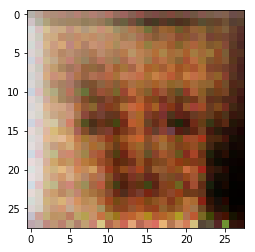

Epoch: 1/1.  Step: 1610.  Discriminator: 0.5506.  Generator: 2.9061.
Epoch: 1/1.  Step: 1620.  Discriminator: 0.5452.  Generator: 2.8771.
Epoch: 1/1.  Step: 1630.  Discriminator: 0.5396.  Generator: 3.1128.
Epoch: 1/1.  Step: 1640.  Discriminator: 0.5882.  Generator: 2.3365.
Epoch: 1/1.  Step: 1650.  Discriminator: 0.9168.  Generator: 1.5568.
Epoch: 1/1.  Step: 1660.  Discriminator: 0.7832.  Generator: 1.5468.
Epoch: 1/1.  Step: 1670.  Discriminator: 0.6121.  Generator: 2.6190.
Epoch: 1/1.  Step: 1680.  Discriminator: 1.0496.  Generator: 2.4214.
Epoch: 1/1.  Step: 1690.  Discriminator: 1.0300.  Generator: 2.1258.
Epoch: 1/1.  Step: 1700.  Discriminator: 0.6366.  Generator: 2.5009.


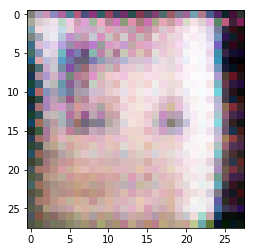

Epoch: 1/1.  Step: 1710.  Discriminator: 0.7093.  Generator: 2.7842.
Epoch: 1/1.  Step: 1720.  Discriminator: 0.5556.  Generator: 2.9781.
Epoch: 1/1.  Step: 1730.  Discriminator: 0.6520.  Generator: 2.4005.
Epoch: 1/1.  Step: 1740.  Discriminator: 0.7988.  Generator: 1.6770.
Epoch: 1/1.  Step: 1750.  Discriminator: 0.5957.  Generator: 2.2744.
Epoch: 1/1.  Step: 1760.  Discriminator: 0.8739.  Generator: 2.2662.
Epoch: 1/1.  Step: 1770.  Discriminator: 0.8503.  Generator: 2.0584.
Epoch: 1/1.  Step: 1780.  Discriminator: 0.9566.  Generator: 1.8944.
Epoch: 1/1.  Step: 1790.  Discriminator: 0.5304.  Generator: 2.8807.
Epoch: 1/1.  Step: 1800.  Discriminator: 0.5873.  Generator: 3.1361.


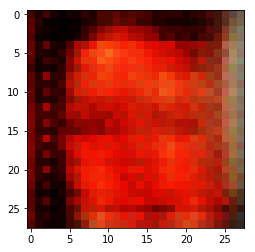

Epoch: 1/1.  Step: 1810.  Discriminator: 0.4963.  Generator: 2.9088.
Epoch: 1/1.  Step: 1820.  Discriminator: 0.4428.  Generator: 3.9666.
Epoch: 1/1.  Step: 1830.  Discriminator: 0.5643.  Generator: 3.3192.
Epoch: 1/1.  Step: 1840.  Discriminator: 0.7016.  Generator: 2.2483.
Epoch: 1/1.  Step: 1850.  Discriminator: 0.5196.  Generator: 2.2529.
Epoch: 1/1.  Step: 1860.  Discriminator: 0.5725.  Generator: 2.1644.
Epoch: 1/1.  Step: 1870.  Discriminator: 0.5770.  Generator: 2.9319.
Epoch: 1/1.  Step: 1880.  Discriminator: 0.5946.  Generator: 2.7517.
Epoch: 1/1.  Step: 1890.  Discriminator: 0.9092.  Generator: 2.1719.
Epoch: 1/1.  Step: 1900.  Discriminator: 0.8696.  Generator: 2.5718.


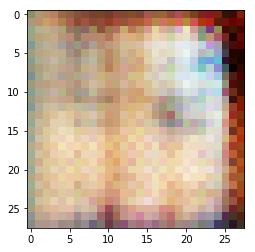

Epoch: 1/1.  Step: 1910.  Discriminator: 0.5575.  Generator: 2.8974.
Epoch: 1/1.  Step: 1920.  Discriminator: 0.5166.  Generator: 2.9685.
Epoch: 1/1.  Step: 1930.  Discriminator: 0.6520.  Generator: 2.7791.
Epoch: 1/1.  Step: 1940.  Discriminator: 0.5595.  Generator: 3.0291.
Epoch: 1/1.  Step: 1950.  Discriminator: 0.5916.  Generator: 2.1131.
Epoch: 1/1.  Step: 1960.  Discriminator: 0.4943.  Generator: 3.1309.
Epoch: 1/1.  Step: 1970.  Discriminator: 0.5241.  Generator: 2.7051.
Epoch: 1/1.  Step: 1980.  Discriminator: 0.5553.  Generator: 2.4270.
Epoch: 1/1.  Step: 1990.  Discriminator: 0.7159.  Generator: 1.7291.
Epoch: 1/1.  Step: 2000.  Discriminator: 0.6114.  Generator: 2.8994.


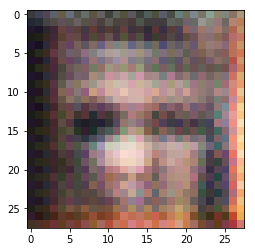

Epoch: 1/1.  Step: 2010.  Discriminator: 0.5146.  Generator: 2.6308.
Epoch: 1/1.  Step: 2020.  Discriminator: 0.5176.  Generator: 3.2193.
Epoch: 1/1.  Step: 2030.  Discriminator: 0.4955.  Generator: 2.6842.
Epoch: 1/1.  Step: 2040.  Discriminator: 0.7347.  Generator: 2.0566.
Epoch: 1/1.  Step: 2050.  Discriminator: 0.7579.  Generator: 2.7083.
Epoch: 1/1.  Step: 2060.  Discriminator: 0.5231.  Generator: 3.2581.
Epoch: 1/1.  Step: 2070.  Discriminator: 0.6757.  Generator: 3.4432.
Epoch: 1/1.  Step: 2080.  Discriminator: 0.7657.  Generator: 2.9275.
Epoch: 1/1.  Step: 2090.  Discriminator: 0.5461.  Generator: 3.5523.
Epoch: 1/1.  Step: 2100.  Discriminator: 0.6112.  Generator: 3.0995.


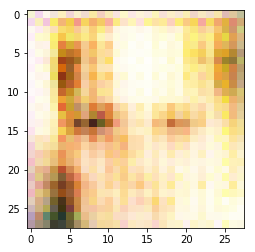

Epoch: 1/1.  Step: 2110.  Discriminator: 0.6754.  Generator: 1.9971.
Epoch: 1/1.  Step: 2120.  Discriminator: 0.5531.  Generator: 2.0525.
Epoch: 1/1.  Step: 2130.  Discriminator: 1.0954.  Generator: 1.5495.
Epoch: 1/1.  Step: 2140.  Discriminator: 0.8635.  Generator: 1.7822.
Epoch: 1/1.  Step: 2150.  Discriminator: 0.4939.  Generator: 2.7654.
Epoch: 1/1.  Step: 2160.  Discriminator: 0.8321.  Generator: 1.3971.
Epoch: 1/1.  Step: 2170.  Discriminator: 1.3159.  Generator: 1.9868.
Epoch: 1/1.  Step: 2180.  Discriminator: 0.9930.  Generator: 1.3429.
Epoch: 1/1.  Step: 2190.  Discriminator: 0.5630.  Generator: 3.0844.
Epoch: 1/1.  Step: 2200.  Discriminator: 0.7024.  Generator: 2.1553.


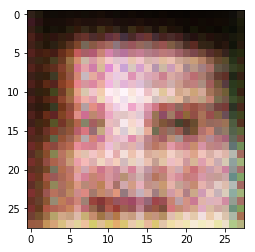

Epoch: 1/1.  Step: 2210.  Discriminator: 0.6571.  Generator: 2.4175.
Epoch: 1/1.  Step: 2220.  Discriminator: 0.8278.  Generator: 1.9609.
Epoch: 1/1.  Step: 2230.  Discriminator: 0.5241.  Generator: 2.7272.
Epoch: 1/1.  Step: 2240.  Discriminator: 0.5720.  Generator: 2.3261.
Epoch: 1/1.  Step: 2250.  Discriminator: 0.5819.  Generator: 2.4692.
Epoch: 1/1.  Step: 2260.  Discriminator: 0.8272.  Generator: 1.8253.
Epoch: 1/1.  Step: 2270.  Discriminator: 0.5701.  Generator: 2.6035.
Epoch: 1/1.  Step: 2280.  Discriminator: 0.5088.  Generator: 3.4752.
Epoch: 1/1.  Step: 2290.  Discriminator: 0.5835.  Generator: 3.1025.
Epoch: 1/1.  Step: 2300.  Discriminator: 0.6437.  Generator: 3.2380.


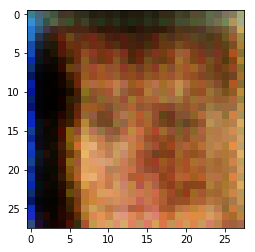

Epoch: 1/1.  Step: 2310.  Discriminator: 0.7867.  Generator: 1.8566.
Epoch: 1/1.  Step: 2320.  Discriminator: 0.6691.  Generator: 2.6156.
Epoch: 1/1.  Step: 2330.  Discriminator: 0.7642.  Generator: 1.6721.
Epoch: 1/1.  Step: 2340.  Discriminator: 0.5891.  Generator: 2.5206.
Epoch: 1/1.  Step: 2350.  Discriminator: 0.7301.  Generator: 1.5435.
Epoch: 1/1.  Step: 2360.  Discriminator: 0.6300.  Generator: 2.1837.
Epoch: 1/1.  Step: 2370.  Discriminator: 0.6604.  Generator: 2.5053.
Epoch: 1/1.  Step: 2380.  Discriminator: 0.6246.  Generator: 2.3249.
Epoch: 1/1.  Step: 2390.  Discriminator: 0.5592.  Generator: 2.8299.
Epoch: 1/1.  Step: 2400.  Discriminator: 0.5788.  Generator: 2.5994.


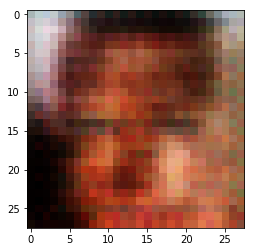

Epoch: 1/1.  Step: 2410.  Discriminator: 0.7011.  Generator: 2.9165.
Epoch: 1/1.  Step: 2420.  Discriminator: 0.5726.  Generator: 2.4909.
Epoch: 1/1.  Step: 2430.  Discriminator: 0.7173.  Generator: 2.5107.
Epoch: 1/1.  Step: 2440.  Discriminator: 0.6030.  Generator: 2.4588.
Epoch: 1/1.  Step: 2450.  Discriminator: 0.4740.  Generator: 3.3936.
Epoch: 1/1.  Step: 2460.  Discriminator: 0.5329.  Generator: 2.8040.
Epoch: 1/1.  Step: 2470.  Discriminator: 0.7349.  Generator: 2.5049.
Epoch: 1/1.  Step: 2480.  Discriminator: 0.7226.  Generator: 2.4845.
Epoch: 1/1.  Step: 2490.  Discriminator: 0.4992.  Generator: 2.9520.
Epoch: 1/1.  Step: 2500.  Discriminator: 0.8039.  Generator: 2.3379.


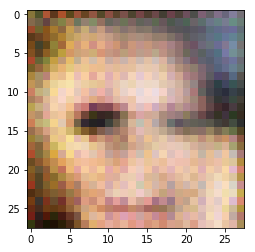

Epoch: 1/1.  Step: 2510.  Discriminator: 0.6333.  Generator: 1.9321.
Epoch: 1/1.  Step: 2520.  Discriminator: 0.7044.  Generator: 2.0831.
Epoch: 1/1.  Step: 2530.  Discriminator: 0.6682.  Generator: 2.4319.
Epoch: 1/1.  Step: 2540.  Discriminator: 0.9099.  Generator: 3.4296.
Epoch: 1/1.  Step: 2550.  Discriminator: 0.6708.  Generator: 3.0296.
Epoch: 1/1.  Step: 2560.  Discriminator: 0.8184.  Generator: 3.3588.
Epoch: 1/1.  Step: 2570.  Discriminator: 0.6649.  Generator: 3.0635.
Epoch: 1/1.  Step: 2580.  Discriminator: 0.6227.  Generator: 1.9975.
Epoch: 1/1.  Step: 2590.  Discriminator: 0.6813.  Generator: 2.2565.
Epoch: 1/1.  Step: 2600.  Discriminator: 0.7674.  Generator: 1.7781.


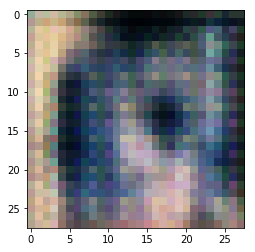

Epoch: 1/1.  Step: 2610.  Discriminator: 0.6462.  Generator: 2.3582.
Epoch: 1/1.  Step: 2620.  Discriminator: 0.6383.  Generator: 2.2809.
Epoch: 1/1.  Step: 2630.  Discriminator: 0.5858.  Generator: 2.7785.
Epoch: 1/1.  Step: 2640.  Discriminator: 0.5470.  Generator: 3.1301.
Epoch: 1/1.  Step: 2650.  Discriminator: 0.4953.  Generator: 2.9336.
Epoch: 1/1.  Step: 2660.  Discriminator: 0.5571.  Generator: 2.8443.
Epoch: 1/1.  Step: 2670.  Discriminator: 0.6348.  Generator: 2.3735.
Epoch: 1/1.  Step: 2680.  Discriminator: 0.6147.  Generator: 1.8786.
Epoch: 1/1.  Step: 2690.  Discriminator: 0.7453.  Generator: 2.9368.
Epoch: 1/1.  Step: 2700.  Discriminator: 0.4939.  Generator: 2.4159.


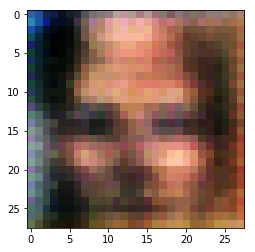

Epoch: 1/1.  Step: 2710.  Discriminator: 0.5217.  Generator: 2.3793.
Epoch: 1/1.  Step: 2720.  Discriminator: 0.6398.  Generator: 2.3406.
Epoch: 1/1.  Step: 2730.  Discriminator: 0.6608.  Generator: 2.1063.
Epoch: 1/1.  Step: 2740.  Discriminator: 0.7131.  Generator: 2.1351.
Epoch: 1/1.  Step: 2750.  Discriminator: 0.7637.  Generator: 2.6470.
Epoch: 1/1.  Step: 2760.  Discriminator: 0.7319.  Generator: 2.2527.
Epoch: 1/1.  Step: 2770.  Discriminator: 0.7628.  Generator: 2.0081.
Epoch: 1/1.  Step: 2780.  Discriminator: 0.5687.  Generator: 2.2166.
Epoch: 1/1.  Step: 2790.  Discriminator: 0.5337.  Generator: 2.2625.
Epoch: 1/1.  Step: 2800.  Discriminator: 0.7896.  Generator: 1.5770.


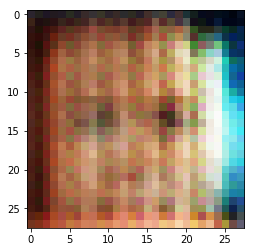

Epoch: 1/1.  Step: 2810.  Discriminator: 0.5764.  Generator: 2.1349.
Epoch: 1/1.  Step: 2820.  Discriminator: 0.5821.  Generator: 2.9598.
Epoch: 1/1.  Step: 2830.  Discriminator: 0.5991.  Generator: 2.6958.
Epoch: 1/1.  Step: 2840.  Discriminator: 0.9432.  Generator: 2.1916.
Epoch: 1/1.  Step: 2850.  Discriminator: 0.6507.  Generator: 2.5862.
Epoch: 1/1.  Step: 2860.  Discriminator: 0.6416.  Generator: 3.4420.
Epoch: 1/1.  Step: 2870.  Discriminator: 0.4896.  Generator: 3.3514.
Epoch: 1/1.  Step: 2880.  Discriminator: 0.5687.  Generator: 3.1227.
Epoch: 1/1.  Step: 2890.  Discriminator: 0.7290.  Generator: 1.6354.
Epoch: 1/1.  Step: 2900.  Discriminator: 0.5390.  Generator: 2.8335.


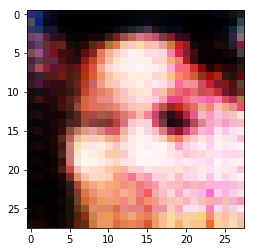

Epoch: 1/1.  Step: 2910.  Discriminator: 0.6805.  Generator: 2.6636.
Epoch: 1/1.  Step: 2920.  Discriminator: 0.9260.  Generator: 1.4940.
Epoch: 1/1.  Step: 2930.  Discriminator: 0.7438.  Generator: 1.7263.
Epoch: 1/1.  Step: 2940.  Discriminator: 0.5375.  Generator: 3.3749.
Epoch: 1/1.  Step: 2950.  Discriminator: 0.5051.  Generator: 3.1413.
Epoch: 1/1.  Step: 2960.  Discriminator: 0.7073.  Generator: 2.2293.
Epoch: 1/1.  Step: 2970.  Discriminator: 0.5328.  Generator: 3.1698.
Epoch: 1/1.  Step: 2980.  Discriminator: 0.9324.  Generator: 2.3072.
Epoch: 1/1.  Step: 2990.  Discriminator: 1.1385.  Generator: 1.5224.
Epoch: 1/1.  Step: 3000.  Discriminator: 0.7630.  Generator: 1.4286.


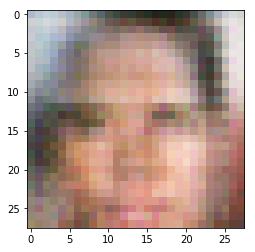

Epoch: 1/1.  Step: 3010.  Discriminator: 0.8035.  Generator: 1.7951.
Epoch: 1/1.  Step: 3020.  Discriminator: 0.7166.  Generator: 2.5216.
Epoch: 1/1.  Step: 3030.  Discriminator: 0.7724.  Generator: 2.9898.
Epoch: 1/1.  Step: 3040.  Discriminator: 0.8883.  Generator: 3.2421.
Epoch: 1/1.  Step: 3050.  Discriminator: 0.9527.  Generator: 2.2499.
Epoch: 1/1.  Step: 3060.  Discriminator: 0.7876.  Generator: 1.8979.
Epoch: 1/1.  Step: 3070.  Discriminator: 0.6780.  Generator: 2.3251.
Epoch: 1/1.  Step: 3080.  Discriminator: 0.6315.  Generator: 2.1902.
Epoch: 1/1.  Step: 3090.  Discriminator: 0.6664.  Generator: 2.2731.
Epoch: 1/1.  Step: 3100.  Discriminator: 0.7018.  Generator: 2.7741.


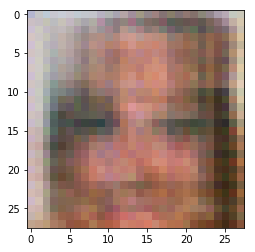

Epoch: 1/1.  Step: 3110.  Discriminator: 0.7140.  Generator: 2.1561.
Epoch: 1/1.  Step: 3120.  Discriminator: 0.8371.  Generator: 2.4267.
Epoch: 1/1.  Step: 3130.  Discriminator: 0.9339.  Generator: 1.8435.
Epoch: 1/1.  Step: 3140.  Discriminator: 0.8043.  Generator: 2.2896.
Epoch: 1/1.  Step: 3150.  Discriminator: 1.1534.  Generator: 2.4618.
Epoch: 1/1.  Step: 3160.  Discriminator: 0.9284.  Generator: 2.9336.
Epoch: 1/1.  Step: 3170.  Discriminator: 0.5411.  Generator: 3.0585.
Epoch: 1/1.  Step: 3180.  Discriminator: 0.9304.  Generator: 1.8041.
Epoch: 1/1.  Step: 3190.  Discriminator: 0.8719.  Generator: 2.1639.
Epoch: 1/1.  Step: 3200.  Discriminator: 0.7615.  Generator: 1.5902.


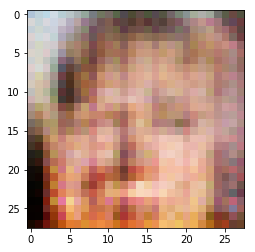

Epoch: 1/1.  Step: 3210.  Discriminator: 0.8707.  Generator: 1.5954.
Epoch: 1/1.  Step: 3220.  Discriminator: 0.7047.  Generator: 2.4381.
Epoch: 1/1.  Step: 3230.  Discriminator: 0.7501.  Generator: 2.1985.
Epoch: 1/1.  Step: 3240.  Discriminator: 0.6889.  Generator: 2.6704.
Epoch: 1/1.  Step: 3250.  Discriminator: 0.8067.  Generator: 2.1410.
Epoch: 1/1.  Step: 3260.  Discriminator: 0.7788.  Generator: 2.3004.
Epoch: 1/1.  Step: 3270.  Discriminator: 1.0236.  Generator: 1.9119.
Epoch: 1/1.  Step: 3280.  Discriminator: 0.6196.  Generator: 2.1647.
Epoch: 1/1.  Step: 3290.  Discriminator: 1.0212.  Generator: 1.5568.
Epoch: 1/1.  Step: 3300.  Discriminator: 1.0030.  Generator: 1.5170.


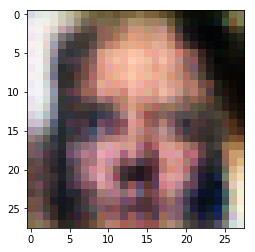

Epoch: 1/1.  Step: 3310.  Discriminator: 0.7398.  Generator: 2.3110.
Epoch: 1/1.  Step: 3320.  Discriminator: 0.8642.  Generator: 1.6970.
Epoch: 1/1.  Step: 3330.  Discriminator: 1.0100.  Generator: 1.4914.
Epoch: 1/1.  Step: 3340.  Discriminator: 0.7844.  Generator: 1.7616.
Epoch: 1/1.  Step: 3350.  Discriminator: 0.8142.  Generator: 1.7258.
Epoch: 1/1.  Step: 3360.  Discriminator: 0.7865.  Generator: 1.7390.
Epoch: 1/1.  Step: 3370.  Discriminator: 0.8852.  Generator: 1.9143.
Epoch: 1/1.  Step: 3380.  Discriminator: 0.7801.  Generator: 1.9672.
Epoch: 1/1.  Step: 3390.  Discriminator: 0.8329.  Generator: 1.7603.
Epoch: 1/1.  Step: 3400.  Discriminator: 0.6155.  Generator: 2.7012.


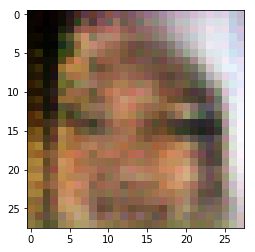

Epoch: 1/1.  Step: 3410.  Discriminator: 0.9901.  Generator: 2.9971.
Epoch: 1/1.  Step: 3420.  Discriminator: 0.7303.  Generator: 2.2890.
Epoch: 1/1.  Step: 3430.  Discriminator: 0.5591.  Generator: 2.5837.
Epoch: 1/1.  Step: 3440.  Discriminator: 0.5184.  Generator: 3.2640.
Epoch: 1/1.  Step: 3450.  Discriminator: 0.5099.  Generator: 3.1307.
Epoch: 1/1.  Step: 3460.  Discriminator: 0.5915.  Generator: 2.5758.
Epoch: 1/1.  Step: 3470.  Discriminator: 0.7124.  Generator: 1.9723.
Epoch: 1/1.  Step: 3480.  Discriminator: 0.7959.  Generator: 1.5816.
Epoch: 1/1.  Step: 3490.  Discriminator: 1.1969.  Generator: 1.1147.
Epoch: 1/1.  Step: 3500.  Discriminator: 0.6917.  Generator: 2.2142.


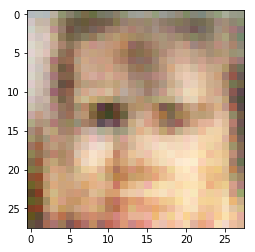

Epoch: 1/1.  Step: 3510.  Discriminator: 0.6624.  Generator: 2.2757.
Epoch: 1/1.  Step: 3520.  Discriminator: 0.8448.  Generator: 2.3442.
Epoch: 1/1.  Step: 3530.  Discriminator: 0.7377.  Generator: 2.1566.
Epoch: 1/1.  Step: 3540.  Discriminator: 0.8847.  Generator: 1.2693.
Epoch: 1/1.  Step: 3550.  Discriminator: 0.8146.  Generator: 1.8032.
Epoch: 1/1.  Step: 3560.  Discriminator: 0.9209.  Generator: 1.8646.
Epoch: 1/1.  Step: 3570.  Discriminator: 0.9077.  Generator: 2.1104.
Epoch: 1/1.  Step: 3580.  Discriminator: 0.7729.  Generator: 2.6328.
Epoch: 1/1.  Step: 3590.  Discriminator: 0.8806.  Generator: 2.2130.
Epoch: 1/1.  Step: 3600.  Discriminator: 0.6893.  Generator: 2.3849.


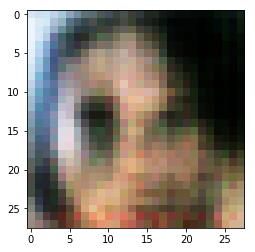

Epoch: 1/1.  Step: 3610.  Discriminator: 0.6848.  Generator: 2.3026.
Epoch: 1/1.  Step: 3620.  Discriminator: 0.5957.  Generator: 2.5572.
Epoch: 1/1.  Step: 3630.  Discriminator: 0.8161.  Generator: 2.1461.
Epoch: 1/1.  Step: 3640.  Discriminator: 0.8013.  Generator: 1.7513.
Epoch: 1/1.  Step: 3650.  Discriminator: 0.6991.  Generator: 2.1264.
Epoch: 1/1.  Step: 3660.  Discriminator: 0.5475.  Generator: 2.7743.
Epoch: 1/1.  Step: 3670.  Discriminator: 0.8002.  Generator: 1.8633.
Epoch: 1/1.  Step: 3680.  Discriminator: 0.7349.  Generator: 2.7931.
Epoch: 1/1.  Step: 3690.  Discriminator: 0.7555.  Generator: 2.3796.
Epoch: 1/1.  Step: 3700.  Discriminator: 0.5885.  Generator: 3.0145.


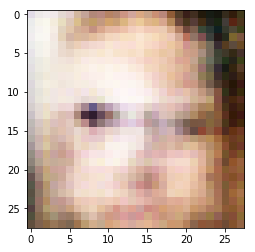

Epoch: 1/1.  Step: 3710.  Discriminator: 0.6547.  Generator: 2.4465.
Epoch: 1/1.  Step: 3720.  Discriminator: 0.9034.  Generator: 1.7453.
Epoch: 1/1.  Step: 3730.  Discriminator: 0.7326.  Generator: 1.9795.
Epoch: 1/1.  Step: 3740.  Discriminator: 0.9423.  Generator: 2.0390.
Epoch: 1/1.  Step: 3750.  Discriminator: 0.8568.  Generator: 1.6844.
Epoch: 1/1.  Step: 3760.  Discriminator: 0.8659.  Generator: 1.8240.
Epoch: 1/1.  Step: 3770.  Discriminator: 0.6230.  Generator: 2.6516.
Epoch: 1/1.  Step: 3780.  Discriminator: 0.7624.  Generator: 2.1053.
Epoch: 1/1.  Step: 3790.  Discriminator: 0.7676.  Generator: 2.0627.
Epoch: 1/1.  Step: 3800.  Discriminator: 0.9000.  Generator: 1.8018.


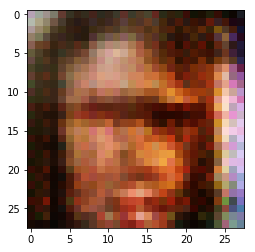

Epoch: 1/1.  Step: 3810.  Discriminator: 0.7271.  Generator: 2.0111.
Epoch: 1/1.  Step: 3820.  Discriminator: 0.7761.  Generator: 2.3265.
Epoch: 1/1.  Step: 3830.  Discriminator: 0.7167.  Generator: 1.9250.
Epoch: 1/1.  Step: 3840.  Discriminator: 1.0869.  Generator: 1.8034.
Epoch: 1/1.  Step: 3850.  Discriminator: 0.7093.  Generator: 2.5028.
Epoch: 1/1.  Step: 3860.  Discriminator: 0.9606.  Generator: 2.5808.
Epoch: 1/1.  Step: 3870.  Discriminator: 0.5044.  Generator: 3.0814.
Epoch: 1/1.  Step: 3880.  Discriminator: 0.9290.  Generator: 2.6714.
Epoch: 1/1.  Step: 3890.  Discriminator: 1.0668.  Generator: 1.9100.
Epoch: 1/1.  Step: 3900.  Discriminator: 0.7549.  Generator: 2.9044.


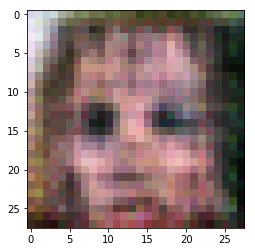

Epoch: 1/1.  Step: 3910.  Discriminator: 0.6401.  Generator: 3.3405.
Epoch: 1/1.  Step: 3920.  Discriminator: 1.0589.  Generator: 2.0829.
Epoch: 1/1.  Step: 3930.  Discriminator: 0.9844.  Generator: 1.3689.
Epoch: 1/1.  Step: 3940.  Discriminator: 1.1723.  Generator: 1.8788.
Epoch: 1/1.  Step: 3950.  Discriminator: 1.0510.  Generator: 2.1268.
Epoch: 1/1.  Step: 3960.  Discriminator: 0.7281.  Generator: 2.5764.
Epoch: 1/1.  Step: 3970.  Discriminator: 0.7387.  Generator: 2.4628.
Epoch: 1/1.  Step: 3980.  Discriminator: 0.9710.  Generator: 1.5491.
Epoch: 1/1.  Step: 3990.  Discriminator: 1.1562.  Generator: 1.9688.
Epoch: 1/1.  Step: 4000.  Discriminator: 0.5841.  Generator: 2.9337.


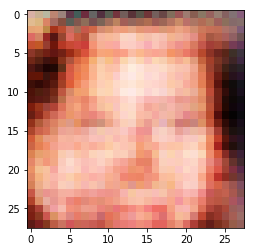

Epoch: 1/1.  Step: 4010.  Discriminator: 0.7763.  Generator: 1.8112.
Epoch: 1/1.  Step: 4020.  Discriminator: 0.8801.  Generator: 1.7744.
Epoch: 1/1.  Step: 4030.  Discriminator: 0.9555.  Generator: 1.5167.
Epoch: 1/1.  Step: 4040.  Discriminator: 0.8392.  Generator: 1.8046.
Epoch: 1/1.  Step: 4050.  Discriminator: 0.9852.  Generator: 1.5515.
Epoch: 1/1.  Step: 4060.  Discriminator: 0.7898.  Generator: 1.6089.
Epoch: 1/1.  Step: 4070.  Discriminator: 0.8656.  Generator: 1.8350.
Epoch: 1/1.  Step: 4080.  Discriminator: 0.7437.  Generator: 2.0727.
Epoch: 1/1.  Step: 4090.  Discriminator: 1.0786.  Generator: 1.9818.
Epoch: 1/1.  Step: 4100.  Discriminator: 0.7747.  Generator: 2.1739.


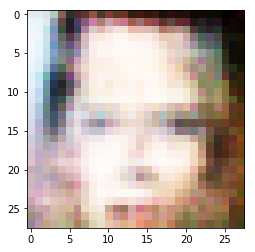

Epoch: 1/1.  Step: 4110.  Discriminator: 0.8473.  Generator: 2.7452.
Epoch: 1/1.  Step: 4120.  Discriminator: 1.4162.  Generator: 2.3754.
Epoch: 1/1.  Step: 4130.  Discriminator: 0.8913.  Generator: 1.7779.
Epoch: 1/1.  Step: 4140.  Discriminator: 0.7160.  Generator: 2.2046.
Epoch: 1/1.  Step: 4150.  Discriminator: 0.8962.  Generator: 2.1694.
Epoch: 1/1.  Step: 4160.  Discriminator: 0.9057.  Generator: 1.7887.
Epoch: 1/1.  Step: 4170.  Discriminator: 1.0977.  Generator: 2.0771.
Epoch: 1/1.  Step: 4180.  Discriminator: 0.7572.  Generator: 2.7407.
Epoch: 1/1.  Step: 4190.  Discriminator: 0.7438.  Generator: 2.4588.
Epoch: 1/1.  Step: 4200.  Discriminator: 1.3409.  Generator: 1.5628.


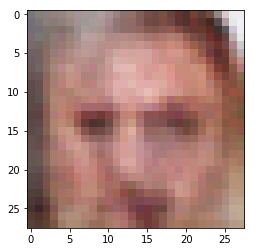

Epoch: 1/1.  Step: 4210.  Discriminator: 0.7070.  Generator: 2.0847.
Epoch: 1/1.  Step: 4220.  Discriminator: 0.7582.  Generator: 1.8393.
Epoch: 1/1.  Step: 4230.  Discriminator: 0.7407.  Generator: 2.2990.
Epoch: 1/1.  Step: 4240.  Discriminator: 0.8398.  Generator: 1.7329.
Epoch: 1/1.  Step: 4250.  Discriminator: 1.1074.  Generator: 1.6796.
Epoch: 1/1.  Step: 4260.  Discriminator: 0.9858.  Generator: 1.9557.
Epoch: 1/1.  Step: 4270.  Discriminator: 0.8325.  Generator: 2.2784.
Epoch: 1/1.  Step: 4280.  Discriminator: 0.8323.  Generator: 1.9070.
Epoch: 1/1.  Step: 4290.  Discriminator: 1.0174.  Generator: 2.1269.
Epoch: 1/1.  Step: 4300.  Discriminator: 0.7238.  Generator: 1.8507.


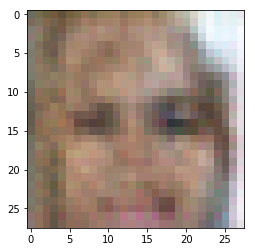

Epoch: 1/1.  Step: 4310.  Discriminator: 1.1017.  Generator: 2.3707.
Epoch: 1/1.  Step: 4320.  Discriminator: 1.3719.  Generator: 0.8213.
Epoch: 1/1.  Step: 4330.  Discriminator: 1.1374.  Generator: 1.9263.
Epoch: 1/1.  Step: 4340.  Discriminator: 0.8596.  Generator: 2.1587.
Epoch: 1/1.  Step: 4350.  Discriminator: 1.1704.  Generator: 1.5191.
Epoch: 1/1.  Step: 4360.  Discriminator: 0.6847.  Generator: 1.8805.
Epoch: 1/1.  Step: 4370.  Discriminator: 0.8084.  Generator: 2.0132.
Epoch: 1/1.  Step: 4380.  Discriminator: 0.7472.  Generator: 1.6632.
Epoch: 1/1.  Step: 4390.  Discriminator: 0.8238.  Generator: 2.0164.
Epoch: 1/1.  Step: 4400.  Discriminator: 1.0128.  Generator: 2.0858.


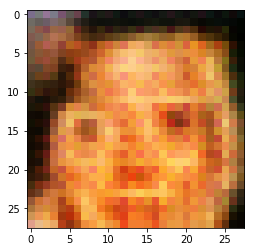

Epoch: 1/1.  Step: 4410.  Discriminator: 0.7026.  Generator: 2.8526.
Epoch: 1/1.  Step: 4420.  Discriminator: 0.7288.  Generator: 2.2930.
Epoch: 1/1.  Step: 4430.  Discriminator: 0.9987.  Generator: 2.0651.
Epoch: 1/1.  Step: 4440.  Discriminator: 1.0370.  Generator: 1.4796.
Epoch: 1/1.  Step: 4450.  Discriminator: 0.7906.  Generator: 1.8837.
Epoch: 1/1.  Step: 4460.  Discriminator: 0.9472.  Generator: 1.5261.
Epoch: 1/1.  Step: 4470.  Discriminator: 1.3414.  Generator: 1.4721.
Epoch: 1/1.  Step: 4480.  Discriminator: 0.7896.  Generator: 1.7751.
Epoch: 1/1.  Step: 4490.  Discriminator: 0.9308.  Generator: 1.7370.
Epoch: 1/1.  Step: 4500.  Discriminator: 0.7064.  Generator: 2.4178.


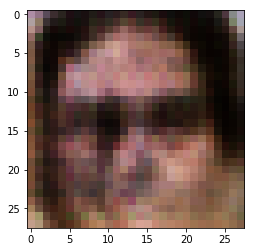

Epoch: 1/1.  Step: 4510.  Discriminator: 0.6920.  Generator: 2.4803.
Epoch: 1/1.  Step: 4520.  Discriminator: 1.6255.  Generator: 1.4079.
Epoch: 1/1.  Step: 4530.  Discriminator: 0.8566.  Generator: 1.5136.
Epoch: 1/1.  Step: 4540.  Discriminator: 0.7056.  Generator: 2.1894.
Epoch: 1/1.  Step: 4550.  Discriminator: 1.2511.  Generator: 1.5573.
Epoch: 1/1.  Step: 4560.  Discriminator: 1.6076.  Generator: 1.2945.
Epoch: 1/1.  Step: 4570.  Discriminator: 0.9648.  Generator: 1.6436.
Epoch: 1/1.  Step: 4580.  Discriminator: 1.2840.  Generator: 1.4449.
Epoch: 1/1.  Step: 4590.  Discriminator: 1.0653.  Generator: 1.3972.
Epoch: 1/1.  Step: 4600.  Discriminator: 0.7674.  Generator: 1.9433.


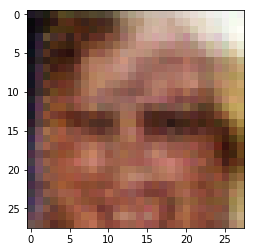

Epoch: 1/1.  Step: 4610.  Discriminator: 0.9446.  Generator: 1.2934.
Epoch: 1/1.  Step: 4620.  Discriminator: 1.2780.  Generator: 1.6886.
Epoch: 1/1.  Step: 4630.  Discriminator: 0.7367.  Generator: 2.3831.
Epoch: 1/1.  Step: 4640.  Discriminator: 1.2139.  Generator: 2.0358.
Epoch: 1/1.  Step: 4650.  Discriminator: 0.8774.  Generator: 1.5153.
Epoch: 1/1.  Step: 4660.  Discriminator: 1.4319.  Generator: 0.9557.
Epoch: 1/1.  Step: 4670.  Discriminator: 0.6278.  Generator: 2.1707.
Epoch: 1/1.  Step: 4680.  Discriminator: 1.3206.  Generator: 1.2942.
Epoch: 1/1.  Step: 4690.  Discriminator: 0.8812.  Generator: 2.1061.
Epoch: 1/1.  Step: 4700.  Discriminator: 0.9135.  Generator: 2.2195.


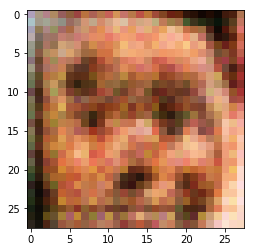

Epoch: 1/1.  Step: 4710.  Discriminator: 0.8424.  Generator: 2.4029.
Epoch: 1/1.  Step: 4720.  Discriminator: 0.8269.  Generator: 2.0592.
Epoch: 1/1.  Step: 4730.  Discriminator: 0.8339.  Generator: 2.2857.
Epoch: 1/1.  Step: 4740.  Discriminator: 0.9237.  Generator: 2.0610.
Epoch: 1/1.  Step: 4750.  Discriminator: 0.9644.  Generator: 1.3089.
Epoch: 1/1.  Step: 4760.  Discriminator: 1.1032.  Generator: 1.4256.
Epoch: 1/1.  Step: 4770.  Discriminator: 1.0978.  Generator: 1.7125.
Epoch: 1/1.  Step: 4780.  Discriminator: 0.7143.  Generator: 1.9991.
Epoch: 1/1.  Step: 4790.  Discriminator: 1.1053.  Generator: 1.4436.
Epoch: 1/1.  Step: 4800.  Discriminator: 1.3460.  Generator: 1.4159.


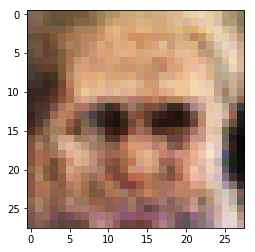

Epoch: 1/1.  Step: 4810.  Discriminator: 1.0342.  Generator: 1.4928.
Epoch: 1/1.  Step: 4820.  Discriminator: 1.0220.  Generator: 1.3723.
Epoch: 1/1.  Step: 4830.  Discriminator: 0.9768.  Generator: 1.6504.
Epoch: 1/1.  Step: 4840.  Discriminator: 1.2053.  Generator: 1.5297.
Epoch: 1/1.  Step: 4850.  Discriminator: 1.3310.  Generator: 1.7372.
Epoch: 1/1.  Step: 4860.  Discriminator: 0.9990.  Generator: 1.9621.
Epoch: 1/1.  Step: 4870.  Discriminator: 1.1055.  Generator: 1.5737.
Epoch: 1/1.  Step: 4880.  Discriminator: 1.1263.  Generator: 1.1812.
Epoch: 1/1.  Step: 4890.  Discriminator: 1.3526.  Generator: 1.2563.
Epoch: 1/1.  Step: 4900.  Discriminator: 0.9080.  Generator: 1.6008.


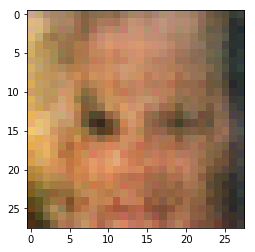

Epoch: 1/1.  Step: 4910.  Discriminator: 0.9113.  Generator: 1.6809.
Epoch: 1/1.  Step: 4920.  Discriminator: 0.8441.  Generator: 2.2356.
Epoch: 1/1.  Step: 4930.  Discriminator: 1.1185.  Generator: 1.7825.
Epoch: 1/1.  Step: 4940.  Discriminator: 1.2034.  Generator: 1.3725.
Epoch: 1/1.  Step: 4950.  Discriminator: 1.0521.  Generator: 1.6003.
Epoch: 1/1.  Step: 4960.  Discriminator: 1.0781.  Generator: 1.7543.
Epoch: 1/1.  Step: 4970.  Discriminator: 1.0290.  Generator: 1.8809.
Epoch: 1/1.  Step: 4980.  Discriminator: 1.1600.  Generator: 1.9658.
Epoch: 1/1.  Step: 4990.  Discriminator: 0.9409.  Generator: 1.4634.
Epoch: 1/1.  Step: 5000.  Discriminator: 1.6971.  Generator: 1.2461.


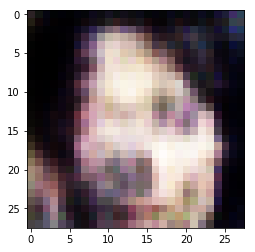

Epoch: 1/1.  Step: 5010.  Discriminator: 0.8706.  Generator: 1.7098.
Epoch: 1/1.  Step: 5020.  Discriminator: 1.0380.  Generator: 1.7462.
Epoch: 1/1.  Step: 5030.  Discriminator: 1.2933.  Generator: 1.1473.
Epoch: 1/1.  Step: 5040.  Discriminator: 0.8302.  Generator: 1.4813.
Epoch: 1/1.  Step: 5050.  Discriminator: 0.9168.  Generator: 1.7828.
Epoch: 1/1.  Step: 5060.  Discriminator: 0.8742.  Generator: 2.1274.
Epoch: 1/1.  Step: 5070.  Discriminator: 0.9483.  Generator: 1.6500.
Epoch: 1/1.  Step: 5080.  Discriminator: 1.0849.  Generator: 1.1470.
Epoch: 1/1.  Step: 5090.  Discriminator: 1.0510.  Generator: 1.1884.
Epoch: 1/1.  Step: 5100.  Discriminator: 1.0941.  Generator: 1.1483.


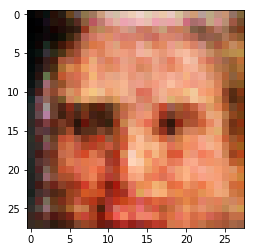

Epoch: 1/1.  Step: 5110.  Discriminator: 1.0952.  Generator: 1.3874.
Epoch: 1/1.  Step: 5120.  Discriminator: 1.1149.  Generator: 1.2879.
Epoch: 1/1.  Step: 5130.  Discriminator: 1.1205.  Generator: 1.9121.
Epoch: 1/1.  Step: 5140.  Discriminator: 1.0487.  Generator: 2.1224.
Epoch: 1/1.  Step: 5150.  Discriminator: 0.9004.  Generator: 1.7369.
Epoch: 1/1.  Step: 5160.  Discriminator: 0.9994.  Generator: 1.5194.
Epoch: 1/1.  Step: 5170.  Discriminator: 1.1326.  Generator: 1.3078.
Epoch: 1/1.  Step: 5180.  Discriminator: 1.5425.  Generator: 1.2282.
Epoch: 1/1.  Step: 5190.  Discriminator: 1.1333.  Generator: 1.3921.
Epoch: 1/1.  Step: 5200.  Discriminator: 1.0840.  Generator: 1.7229.


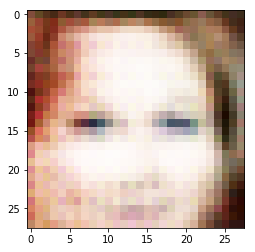

Epoch: 1/1.  Step: 5210.  Discriminator: 1.1315.  Generator: 1.5775.
Epoch: 1/1.  Step: 5220.  Discriminator: 0.9940.  Generator: 1.3079.
Epoch: 1/1.  Step: 5230.  Discriminator: 1.0367.  Generator: 1.5398.
Epoch: 1/1.  Step: 5240.  Discriminator: 0.9600.  Generator: 2.1243.
Epoch: 1/1.  Step: 5250.  Discriminator: 1.6039.  Generator: 1.1787.
Epoch: 1/1.  Step: 5260.  Discriminator: 1.0806.  Generator: 1.1387.
Epoch: 1/1.  Step: 5270.  Discriminator: 0.7988.  Generator: 1.8136.
Epoch: 1/1.  Step: 5280.  Discriminator: 0.7922.  Generator: 2.1820.
Epoch: 1/1.  Step: 5290.  Discriminator: 0.9758.  Generator: 1.5369.
Epoch: 1/1.  Step: 5300.  Discriminator: 1.0914.  Generator: 1.1609.


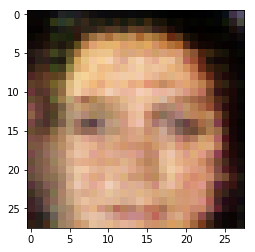

Epoch: 1/1.  Step: 5310.  Discriminator: 1.4082.  Generator: 1.0024.
Epoch: 1/1.  Step: 5320.  Discriminator: 1.0682.  Generator: 1.1184.
Epoch: 1/1.  Step: 5330.  Discriminator: 0.8930.  Generator: 1.5522.
Epoch: 1/1.  Step: 5340.  Discriminator: 1.0374.  Generator: 1.2969.
Epoch: 1/1.  Step: 5350.  Discriminator: 1.3301.  Generator: 1.3428.
Epoch: 1/1.  Step: 5360.  Discriminator: 1.0452.  Generator: 1.5461.
Epoch: 1/1.  Step: 5370.  Discriminator: 0.7920.  Generator: 1.8536.
Epoch: 1/1.  Step: 5380.  Discriminator: 0.8613.  Generator: 1.5566.
Epoch: 1/1.  Step: 5390.  Discriminator: 1.1583.  Generator: 1.4744.
Epoch: 1/1.  Step: 5400.  Discriminator: 1.2698.  Generator: 1.0921.


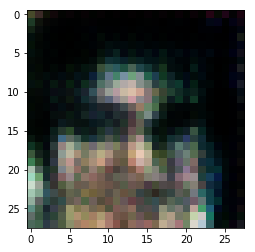

Epoch: 1/1.  Step: 5410.  Discriminator: 1.4899.  Generator: 0.7802.
Epoch: 1/1.  Step: 5420.  Discriminator: 0.9382.  Generator: 1.1984.
Epoch: 1/1.  Step: 5430.  Discriminator: 0.8234.  Generator: 1.4379.
Epoch: 1/1.  Step: 5440.  Discriminator: 1.3961.  Generator: 1.0042.
Epoch: 1/1.  Step: 5450.  Discriminator: 1.3422.  Generator: 1.8030.
Epoch: 1/1.  Step: 5460.  Discriminator: 0.9596.  Generator: 1.7271.
Epoch: 1/1.  Step: 5470.  Discriminator: 0.8820.  Generator: 1.4116.
Epoch: 1/1.  Step: 5480.  Discriminator: 1.0706.  Generator: 1.3877.
Epoch: 1/1.  Step: 5490.  Discriminator: 1.4525.  Generator: 0.8615.
Epoch: 1/1.  Step: 5500.  Discriminator: 0.9365.  Generator: 1.3146.


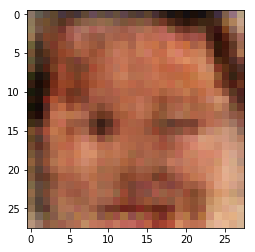

Epoch: 1/1.  Step: 5510.  Discriminator: 1.0807.  Generator: 1.0974.
Epoch: 1/1.  Step: 5520.  Discriminator: 1.0774.  Generator: 1.1472.
Epoch: 1/1.  Step: 5530.  Discriminator: 0.9342.  Generator: 1.3164.
Epoch: 1/1.  Step: 5540.  Discriminator: 1.0384.  Generator: 1.3543.
Epoch: 1/1.  Step: 5550.  Discriminator: 1.0925.  Generator: 1.3474.
Epoch: 1/1.  Step: 5560.  Discriminator: 1.2979.  Generator: 1.0790.
Epoch: 1/1.  Step: 5570.  Discriminator: 1.1530.  Generator: 1.1039.
Epoch: 1/1.  Step: 5580.  Discriminator: 1.5424.  Generator: 1.4629.
Epoch: 1/1.  Step: 5590.  Discriminator: 0.8897.  Generator: 1.9890.
Epoch: 1/1.  Step: 5600.  Discriminator: 0.9827.  Generator: 1.6343.


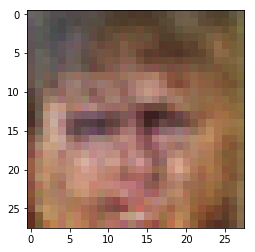

Epoch: 1/1.  Step: 5610.  Discriminator: 0.8266.  Generator: 1.7560.
Epoch: 1/1.  Step: 5620.  Discriminator: 1.0042.  Generator: 1.4315.
Epoch: 1/1.  Step: 5630.  Discriminator: 0.7338.  Generator: 1.6548.
Epoch: 1/1.  Step: 5640.  Discriminator: 1.0182.  Generator: 2.0116.
Epoch: 1/1.  Step: 5650.  Discriminator: 1.3029.  Generator: 1.1973.
Epoch: 1/1.  Step: 5660.  Discriminator: 1.0210.  Generator: 1.6856.
Epoch: 1/1.  Step: 5670.  Discriminator: 1.2260.  Generator: 1.6038.
Epoch: 1/1.  Step: 5680.  Discriminator: 0.8626.  Generator: 2.2959.
Epoch: 1/1.  Step: 5690.  Discriminator: 1.0137.  Generator: 2.0408.
Epoch: 1/1.  Step: 5700.  Discriminator: 0.7604.  Generator: 2.0598.


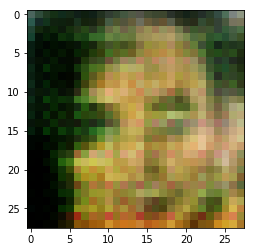

Epoch: 1/1.  Step: 5710.  Discriminator: 0.9273.  Generator: 1.5773.
Epoch: 1/1.  Step: 5720.  Discriminator: 0.8480.  Generator: 1.6772.
Epoch: 1/1.  Step: 5730.  Discriminator: 0.9860.  Generator: 2.1547.
Epoch: 1/1.  Step: 5740.  Discriminator: 1.1598.  Generator: 1.7807.
Epoch: 1/1.  Step: 5750.  Discriminator: 1.3762.  Generator: 1.0265.
Epoch: 1/1.  Step: 5760.  Discriminator: 1.2735.  Generator: 1.0559.
Epoch: 1/1.  Step: 5770.  Discriminator: 1.2095.  Generator: 0.9675.
Epoch: 1/1.  Step: 5780.  Discriminator: 0.8542.  Generator: 1.6363.
Epoch: 1/1.  Step: 5790.  Discriminator: 0.9809.  Generator: 1.3078.
Epoch: 1/1.  Step: 5800.  Discriminator: 0.9603.  Generator: 1.4105.


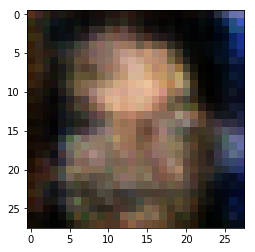

Epoch: 1/1.  Step: 5810.  Discriminator: 1.1722.  Generator: 1.2800.
Epoch: 1/1.  Step: 5820.  Discriminator: 1.1466.  Generator: 1.2621.
Epoch: 1/1.  Step: 5830.  Discriminator: 0.8412.  Generator: 1.7238.
Epoch: 1/1.  Step: 5840.  Discriminator: 1.6500.  Generator: 0.8729.
Epoch: 1/1.  Step: 5850.  Discriminator: 1.2800.  Generator: 1.3598.
Epoch: 1/1.  Step: 5860.  Discriminator: 1.1898.  Generator: 1.5690.
Epoch: 1/1.  Step: 5870.  Discriminator: 1.0607.  Generator: 2.2813.
Epoch: 1/1.  Step: 5880.  Discriminator: 1.0588.  Generator: 1.4171.
Epoch: 1/1.  Step: 5890.  Discriminator: 1.1399.  Generator: 1.4646.
Epoch: 1/1.  Step: 5900.  Discriminator: 1.2158.  Generator: 1.3124.


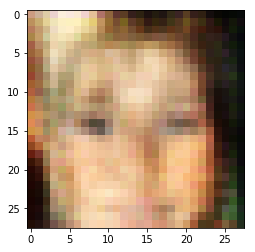

Epoch: 1/1.  Step: 5910.  Discriminator: 0.7464.  Generator: 1.7015.
Epoch: 1/1.  Step: 5920.  Discriminator: 0.8892.  Generator: 1.9505.
Epoch: 1/1.  Step: 5930.  Discriminator: 1.0553.  Generator: 1.4936.
Epoch: 1/1.  Step: 5940.  Discriminator: 1.1542.  Generator: 1.3906.
Epoch: 1/1.  Step: 5950.  Discriminator: 0.9688.  Generator: 1.4116.
Epoch: 1/1.  Step: 5960.  Discriminator: 1.1078.  Generator: 1.6235.
Epoch: 1/1.  Step: 5970.  Discriminator: 1.3380.  Generator: 1.2658.
Epoch: 1/1.  Step: 5980.  Discriminator: 1.2511.  Generator: 1.2125.
Epoch: 1/1.  Step: 5990.  Discriminator: 1.2215.  Generator: 1.2168.
Epoch: 1/1.  Step: 6000.  Discriminator: 1.3258.  Generator: 1.1079.


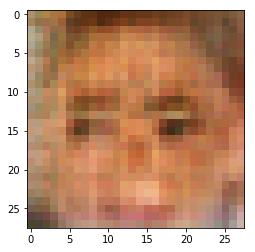

Epoch: 1/1.  Step: 6010.  Discriminator: 1.1233.  Generator: 1.3393.
Epoch: 1/1.  Step: 6020.  Discriminator: 1.3421.  Generator: 1.1327.
Epoch: 1/1.  Step: 6030.  Discriminator: 0.9539.  Generator: 1.3720.
Epoch: 1/1.  Step: 6040.  Discriminator: 1.5233.  Generator: 0.8310.
Epoch: 1/1.  Step: 6050.  Discriminator: 1.4200.  Generator: 1.0825.
Epoch: 1/1.  Step: 6060.  Discriminator: 1.1485.  Generator: 1.3087.
Epoch: 1/1.  Step: 6070.  Discriminator: 1.0312.  Generator: 1.5262.
Epoch: 1/1.  Step: 6080.  Discriminator: 1.0352.  Generator: 1.3532.
Epoch: 1/1.  Step: 6090.  Discriminator: 1.3221.  Generator: 0.8069.
Epoch: 1/1.  Step: 6100.  Discriminator: 1.2081.  Generator: 1.3987.


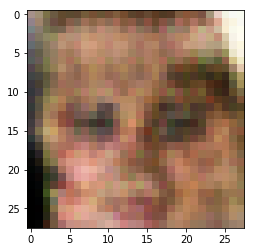

Epoch: 1/1.  Step: 6110.  Discriminator: 1.0835.  Generator: 1.5926.
Epoch: 1/1.  Step: 6120.  Discriminator: 1.1127.  Generator: 1.6366.
Epoch: 1/1.  Step: 6130.  Discriminator: 1.2796.  Generator: 1.2983.
Epoch: 1/1.  Step: 6140.  Discriminator: 1.2808.  Generator: 1.2389.
Epoch: 1/1.  Step: 6150.  Discriminator: 0.9981.  Generator: 1.2485.
Epoch: 1/1.  Step: 6160.  Discriminator: 0.8527.  Generator: 1.9375.
Epoch: 1/1.  Step: 6170.  Discriminator: 0.9761.  Generator: 1.3671.
Epoch: 1/1.  Step: 6180.  Discriminator: 1.1159.  Generator: 1.2144.
Epoch: 1/1.  Step: 6190.  Discriminator: 1.0444.  Generator: 1.6908.
Epoch: 1/1.  Step: 6200.  Discriminator: 1.4351.  Generator: 1.0249.


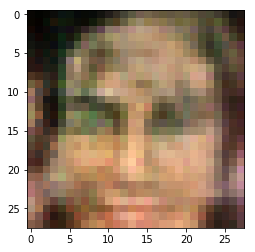

Epoch: 1/1.  Step: 6210.  Discriminator: 1.4351.  Generator: 1.0995.
Epoch: 1/1.  Step: 6220.  Discriminator: 0.8330.  Generator: 1.4657.
Epoch: 1/1.  Step: 6230.  Discriminator: 0.8268.  Generator: 1.6402.
Epoch: 1/1.  Step: 6240.  Discriminator: 0.8645.  Generator: 1.6561.
Epoch: 1/1.  Step: 6250.  Discriminator: 1.5321.  Generator: 0.8865.
Epoch: 1/1.  Step: 6260.  Discriminator: 1.4552.  Generator: 1.3285.
Epoch: 1/1.  Step: 6270.  Discriminator: 0.9785.  Generator: 1.3006.
Epoch: 1/1.  Step: 6280.  Discriminator: 0.9705.  Generator: 1.5668.
Epoch: 1/1.  Step: 6290.  Discriminator: 0.9750.  Generator: 1.5091.
Epoch: 1/1.  Step: 6300.  Discriminator: 0.7496.  Generator: 1.9287.


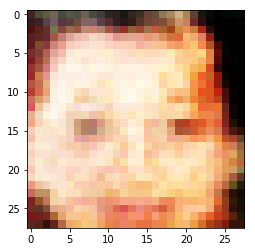

Epoch: 1/1.  Step: 6310.  Discriminator: 0.7639.  Generator: 1.8872.
Epoch: 1/1.  Step: 6320.  Discriminator: 1.4209.  Generator: 1.1053.
Epoch: 1/1.  Step: 6330.  Discriminator: 1.0486.  Generator: 1.2957.


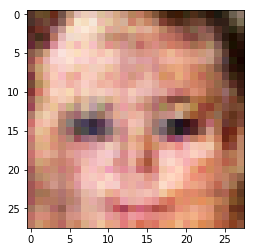

In [19]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.9

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.